In [1]:
from library.experiments import *
from library.objective_function import *
from library.optimiser import *

In [54]:
# init and setup one experiment
exp = single_experiment()
# One experiment: setup objective function
n = 256
ak = ackley(n)
exp.set_objective(ak)
ad = adam()
optParas = {
         'x0': torch.rand(n, requires_grad=True).cuda()*10,
         'alpha': 0.1,
         'beta_1': 0.9, 
         'beta_2': 0.999, 
         'epsilon': 1e-11, 
         'max_iter': 50,
         'tol': 1e-6,              
         'verbose': True,
         'record': True }
ad.set_parameters(optParas)
exp.set_optimizer(ad)
data = exp.do()



*******starting optimisation from intitial point:  92.84882
total evaluatios = 50
gradient at stop position = 0.21315354108810425,
modified graident = 2.3892405033111572
found minimum position = 92.35115814208984, found minimum = 13.768570899963379
distance domain, codomain:  92.35115595885095 13.769134521484375
Result:  local minimum
found minimum: 13.769134521484375, minimum position: 92.35115814208984, evals: 50


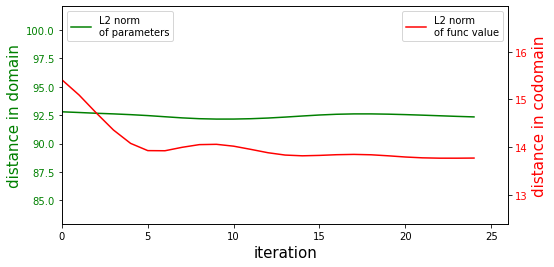

In [55]:
anas = post_analysis_single(data)
anas.plot_distance()


In [3]:
# init and setup one experiment
exp = single_experiment()
# One experiment: setup objective function
ak = ackley()
exp.set_objective(ak)
ln = line_search()
optParas = {
    'x0': torch.tensor([16.23, 23.023], requires_grad=True),
    'alpha': 1,
    'beta': 0.1, 
    'max_iter': 1000,
    'tol': 1e-3,              
    'verbose': True,
    'record': False
}
ln.set_parameters(optParas)
exp.set_optimizer(ln)
exp.do()


*******starting optimisation from intitial point:  [16.23  23.023]
total evaluatios = 41
gradient at stop position = [0.00045202 0.00023452]
found minimum position = [15.999435 22.99918 ], found minimum = 19.61959457397461
Result:  local minimum
found minimum: 19.61959457397461, minimum position: [15.999435 22.99918 ], evals: 41


('local minimum', tensor(19.6196, grad_fn=<AddBackward0>), 41)

In [ ]:
# init and setup one experiment
exp = single_experiment()
# One experiment: setup objective function
ak = ackley()
exp.set_objective(ak)
opt = cma_es(dim=2)
optParas ={'x0': torch.tensor([196.23, 123.023], requires_grad=True).cuda(),
           'std': torch.ones((2,)).cuda() * 3, 
           'tol': 1e-3, 
           'adjust_func': do_nothing(), 
           'record': False, 
           'verbose': True}
opt.set_parameters(optParas)
exp.set_optimizer(opt)
exp.do()

In [45]:
# init and setup one experiment
exp = single_experiment()
# One experiment: setup objective function
n = 256
ak = ackley(dim=n)
exp.set_objective(ak)
opt = cma_es(dim=n)
optParas ={'x0': torch.rand(n, requires_grad=True).cuda()*10,
           'std': torch.ones((n,)).cuda() * 0.0003, 
           'tol': 1e-5, 
           'adjust_func': do_nothing(), 
           'record': True, 
           'verbose': True}
opt.set_parameters(optParas)
exp.set_optimizer(opt)
ana = exp.do()



*******starting optimisation from intitial mean:  88.87067
iter:  1
loss:  15.156011581420898
latent:  [6.7039003  4.9301734  5.453107   0.8268254  9.695368   6.7139316
 5.8758144  3.9681292  9.395718   1.1900187  6.431184   1.8463701
 6.6466665  7.1363535  3.4503965  8.00978    4.5011477  2.7622266
 7.9295073  7.136588   8.164379   0.823552   3.252763   2.2572477
 1.2398632  3.4091077  2.795771   7.785505   9.023829   1.8470434
 4.3470416  2.9309177  1.2263454  8.151987   2.7095957  6.1298223
 7.516998   5.6288495  4.693534   4.2439795  2.6148028  1.109438
 1.2619636  0.15331069 2.4675884  6.6582303  2.3608356  7.6186614
 2.2372544  0.8884271  0.8310383  9.740073   1.0116107  9.556091
 4.508518   0.6982179  2.5451572  5.772838   2.442971   2.7180119
 9.153172   9.6150255  6.3272285  6.5951385  6.0193443  5.3670774
 6.8562903  9.435529   1.7965943  6.411462   5.8653274  7.693039
 0.85431075 3.718242   6.8971834  3.0385845  0.7224324  2.4369967
 4.757026   0.8552546  3.196336   3.1976

iter:  6
loss:  15.155261039733887
latent:  [6.7031517  4.931199   5.4526396  0.8286887  9.694936   6.715032
 5.876266   3.9680018  9.394394   1.1886159  6.430671   1.847315
 6.6474667  7.1360893  3.450183   8.00974    4.501925   2.763275
 7.928189   7.1351085  8.163774   0.82341903 3.2521884  2.257191
 1.2392861  3.4097707  2.796902   7.7861114  9.023863   1.8479007
 4.3452454  2.9319832  1.2243947  8.151479   2.708895   6.129948
 7.5183835  5.629389   4.6943755  4.2434134  2.614424   1.1095952
 1.2611105  0.15179223 2.4674432  6.6589007  2.3618343  7.6190753
 2.235843   0.8876581  0.8314478  9.741697   1.0121174  9.554933
 4.5095944  0.6985786  2.546157   5.77272    2.4425287  2.7190819
 9.154224   9.6136265  6.325908   6.595      6.0172176  5.3670473
 6.8554068  9.435604   1.7974893  6.4107223  5.8665824  7.693051
 0.85222614 3.7200613  6.8967347  3.0389652  0.7230612  2.4369571
 4.7576942  0.8554592  3.1953654  3.1962423  3.1582646  9.206126
 5.165275   7.6228404  9.919948   0.4987

iter:  9
loss:  15.154080390930176
latent:  [6.7046084  4.930513   5.45228    0.82855916 9.693427   6.7170315
 5.877661   3.9684234  9.395031   1.1881868  6.4337344  1.8457562
 6.646559   7.1347084  3.449476   8.010081   4.5007844  2.7634962
 7.9288816  7.1339784  8.16382    0.8235472  3.2531695  2.2544694
 1.2370348  3.407149   2.796315   7.787038   9.024143   1.8477212
 4.346333   2.9319077  1.2216462  8.151581   2.7108786  6.1289887
 7.516796   5.629503   4.696457   4.24508    2.6139216  1.1096226
 1.2599117  0.15379015 2.4657936  6.6581917  2.3626406  7.6166425
 2.2368662  0.88907695 0.83220434 9.743648   1.0129246  9.555835
 4.5090065  0.69952303 2.5457418  5.771617   2.4427063  2.718036
 9.153887   9.614472   6.326926   6.596034   6.0206437  5.3657813
 6.851623   9.435471   1.7998552  6.411156   5.867226   7.694146
 0.8552048  3.7207475  6.897271   3.0378807  0.7234845  2.4376516
 4.7573056  0.85467094 3.1947842  3.198075   3.1572175  9.204755
 5.161203   7.62382    9.922624   0.

iter:  12
loss:  15.152424812316895
latent:  [6.7007756  4.926217   5.454354   0.82730556 9.692781   6.7106013
 5.879489   3.974103   9.3948965  1.1868507  6.4323916  1.8439215
 6.6493907  7.1364303  3.4496498  8.01071    4.5023246  2.7637038
 7.928375   7.1350636  8.159096   0.82909673 3.252537   2.257826
 1.2393337  3.4086716  2.7983904  7.789602   9.020264   1.8513553
 4.3447576  2.9300923  1.2200449  8.153927   2.7132075  6.129225
 7.516421   5.633774   4.6923695  4.2437115  2.614183   1.1093838
 1.2604368  0.14942664 2.4638724  6.6610384  2.362294   7.6214795
 2.2402866  0.8919596  0.83317    9.74282    1.0163559  9.556431
 4.5126476  0.69653845 2.5450501  5.7711773  2.44363    2.7181187
 9.15329    9.613202   6.324563   6.5951567  6.01891    5.361928
 6.8542657  9.432595   1.798176   6.4088893  5.8663764  7.6930914
 0.86183935 3.717667   6.8970027  3.0382183  0.72604555 2.436353
 4.7551713  0.85353786 3.1972675  3.1949675  3.1614451  9.205506
 5.157649   7.623302   9.922873   0.4

iter:  15
loss:  15.149444580078125
latent:  [6.7082767  4.930599   5.450332   0.8291422  9.694503   6.7142615
 5.881438   3.9723735  9.400946   1.196327   6.424696   1.8379166
 6.6417646  7.1347585  3.449102   8.007986   4.4966455  2.7694032
 7.9282603  7.138183   8.155918   0.83186257 3.250706   2.2469823
 1.2331795  3.4136229  2.7991114  7.790207   9.01979    1.8452165
 4.3402696  2.9269998  1.2274271  8.160172   2.7160137  6.1304984
 7.51683    5.6338625  4.6903195  4.245105   2.6109319  1.1099434
 1.2538843  0.14825729 2.4705143  6.66111    2.3659544  7.626535
 2.2355077  0.88772255 0.83504087 9.743759   1.0218531  9.554988
 4.5114393  0.7039417  2.5392714  5.778528   2.4452183  2.7178352
 9.148743   9.612374   6.3247867  6.595642   6.0207186  5.3719864
 6.8611856  9.425088   1.7993463  6.410003   5.8681326  7.695786
 0.85343    3.7219067  6.8976216  3.039135   0.72313285 2.4412906
 4.7562222  0.84682125 3.1926293  3.193588   3.1574693  9.202222
 5.149413   7.6231036  9.92193    0

iter:  18
loss:  15.143533706665039
latent:  [6.7147098  4.9288254  5.4477453  0.83917975 9.696098   6.716805
 5.8961525  3.966403   9.393023   1.1902237  6.425331   1.8430431
 6.6422243  7.1237288  3.446949   8.011335   4.5006995  2.7686543
 7.9132853  7.1452656  8.155277   0.8322861  3.2507207  2.2530603
 1.2291228  3.4107609  2.814293   7.797688   9.019988   1.8440505
 4.351057   2.92131    1.2420702  8.144411   2.7248728  6.12931
 7.5186963  5.6264343  4.6967154  4.2444353  2.6146555  1.097354
 1.2566437  0.14585406 2.4557066  6.658861   2.363232   7.6270084
 2.236411   0.88244957 0.81953347 9.738721   1.0125028  9.560642
 4.5127196  0.7124683  2.5474944  5.787606   2.4362812  2.719135
 9.152482   9.614769   6.3072853  6.5873547  6.0233884  5.383017
 6.8550553  9.416439   1.7954084  6.4080653  5.870541   7.690442
 0.8610848  3.737558   6.906457   3.036686   0.7315317  2.429668
 4.7659125  0.8634798  3.2034874  3.190274   3.1489713  9.198015
 5.14885    7.632283   9.924442   0.50623

iter:  23
loss:  15.11945629119873
latent:  [ 6.7317195e+00  4.9326792e+00  5.4576607e+00  8.6553532e-01
  9.6736975e+00  6.7506113e+00  5.9071846e+00  4.0265994e+00
  9.3628578e+00  1.2110558e+00  6.4021158e+00  1.8796035e+00
  6.6504011e+00  7.1197028e+00  3.4618964e+00  7.9979372e+00
  4.4943128e+00  2.7918870e+00  7.9469461e+00  7.1591539e+00
  8.1640120e+00  8.2593954e-01  3.2599285e+00  2.2681775e+00
  1.2064275e+00  3.4067771e+00  2.8128936e+00  7.7631645e+00
  9.0310984e+00  1.8598011e+00  4.3255906e+00  2.9459655e+00
  1.2211231e+00  8.1272993e+00  2.7256908e+00  6.1325321e+00
  7.5124106e+00  5.6507230e+00  4.7444468e+00  4.2098255e+00
  2.6263938e+00  1.0798340e+00  1.2512425e+00  1.5326664e-01
  2.4852016e+00  6.6718888e+00  2.3604591e+00  7.6005058e+00
  2.2110209e+00  8.8115525e-01  8.5972452e-01  9.7393646e+00
  1.0136294e+00  9.5564947e+00  4.5188227e+00  6.9556022e-01
  2.5522325e+00  5.8056755e+00  2.4739025e+00  2.6916111e+00
  9.1856365e+00  9.6022472e+00  6.2954040

iter:  26
loss:  15.09813404083252
latent:  [6.7574453  4.8959775  5.442959   0.78240615 9.68746    6.7456093
 5.932786   3.997076   9.439678   1.1694894  6.3918657  1.8898894
 6.6748724  7.122287   3.399483   8.082395   4.5022683  2.7832892
 7.97179    7.1623063  8.159226   0.8911349  3.2632306  2.2626925
 1.2648174  3.3640513  2.7686088  7.8114433  9.039623   1.8418406
 4.2829466  2.9286616  1.2045059  8.124465   2.7178602  6.133014
 7.4931912  5.6641717  4.7478256  4.2300143  2.6048694  1.084694
 1.3024795  0.17759384 2.5029655  6.657351   2.3517709  7.6307025
 2.200369   0.9122525  0.89202756 9.7495575  1.0134412  9.5780325
 4.5540767  0.7501151  2.4970717  5.8462496  2.4489837  2.726209
 9.132834   9.620017   6.3277974  6.6445675  6.014792   5.354534
 6.856372   9.417432   1.8183476  6.3830905  5.9305053  7.7161164
 0.88290495 3.7188785  6.8556166  2.9908662  0.7458339  2.4363
 4.734548   0.83743644 3.1668396  3.1800356  3.1371865  9.119002
 5.1262007  7.654849   9.940762   0.4944

iter:  29
loss:  15.05734920501709
latent:  [ 6.7169266   4.97461     5.5322323   0.81035507  9.673617    6.692203
  5.901115    3.9655626   9.386485    1.1590327   6.2226872   1.8156683
  6.610424    7.063679    3.4632342   8.133309    4.3926826   2.782923
  8.0122      7.2403927   8.154161    0.80054724  3.2452934   2.337983
  1.1744193   3.2796335   2.7811856   7.7926292   9.033638    1.851366
  4.255198    2.8979812   1.2396718   8.172671    2.6663687   6.092215
  7.4671907   5.68923     4.793712    4.160763    2.6616583   1.0790079
  1.3030387   0.11839042  2.4556859   6.668217    2.3245838   7.586849
  2.1993392   0.87712246  0.9546779   9.800166    0.9942784   9.551307
  4.4819655   0.6849937   2.540271    5.8176055   2.3826787   2.6561232
  9.119933    9.55803     6.212319    6.6678405   6.099169    5.414344
  6.891449    9.417551    1.7804072   6.2858763   5.8255897   7.821391
  0.8246509   3.650189    6.8279195   3.0371287   0.63803756  2.385419
  4.734592    0.8916606   3.17

iter:  32
loss:  14.986380577087402
latent:  [ 6.8279095   5.056143    5.4091334   0.9220614   9.6597805   6.7732377
  5.9976387   3.874721    9.473195    0.9751866   6.3002157   1.752765
  6.606687    7.0778193   3.3683426   8.01898     4.3198223   2.7481878
  7.948124    7.1746526   8.245507    0.74236435  3.1999576   2.3109744
  1.239312    3.295686    2.688861    7.792858    9.019394    1.839296
  4.2753024   2.8245218   1.1366976   8.005321    2.8798888   6.073339
  7.476545    5.752597    4.8787775   4.2978      2.585148    1.0389693
  1.2156156   0.18890597  2.4303496   6.693102    2.3728251   7.651871
  2.2879932   0.6935835   0.9782121   9.875719    0.9884131   9.55779
  4.4672084   0.72954     2.6368678   5.96065     2.355234    2.5976145
  8.989989    9.45918     6.1840973   6.6220217   6.203903    5.4365196
  6.730653    9.507214    1.7932574   6.244368    5.836968    7.7720647
  0.9001967   3.7081022   6.8781037   3.1951046   0.68628806  2.4726577
  4.648335    0.98662305 

iter:  36
loss:  14.895796775817871
latent:  [ 6.538546    4.9151254   5.3443217   0.68719363  9.926524    6.6750646
  5.99157     4.283016    9.441194    1.0681548   6.205074    2.048254
  6.4375124   7.126581    3.5400717   8.146402    4.085495    2.4598634
  7.805317    7.3135777   7.9311123   0.7246321   3.2760444   2.2230792
  1.1644361   3.25987     2.8110929   7.747753    8.876789    1.7921691
  4.2367086   2.9270682   1.1835587   8.056088    2.8067486   6.031205
  7.2365284   5.73498     5.0093446   4.0480537   2.739813    0.8439737
  0.9811042   0.29091933  2.5433173   6.713676    2.28154     7.5680027
  2.1568205   0.90161693  1.0443649   9.748314    0.8481705   9.519118
  4.8014054   0.56036633  2.695521    5.9883084   2.5068116   2.7615266
  9.084344    9.463987    6.316309    6.868295    6.146948    5.194784
  6.6983995   9.459054    1.9236426   6.21325     6.0153046   8.016763
  1.0944816   3.7716134   6.8588533   2.964865    0.7474127   2.3158073
  4.6026363   0.93803036

iter:  41
loss:  14.836905479431152
latent:  [ 6.7318974e+00  4.8796949e+00  5.1864519e+00  8.9972782e-01
  9.6039572e+00  6.8814106e+00  5.7889500e+00  3.6075428e+00
  9.2829990e+00  8.0518848e-01  6.3110995e+00  2.0923972e+00
  6.4301414e+00  6.7281580e+00  3.6460757e+00  8.3607121e+00
  3.7925038e+00  2.4138513e+00  7.8388081e+00  6.7545004e+00
  8.2102966e+00  8.9505112e-01  3.5404215e+00  2.2961445e+00
  1.2063874e+00  3.3595424e+00  2.9723439e+00  7.8512182e+00
  8.7798538e+00  1.9153732e+00  4.5890474e+00  2.7337239e+00
  1.1300727e+00  8.1427298e+00  3.0170600e+00  6.0830154e+00
  7.8372126e+00  5.6213565e+00  4.9910760e+00  4.4742222e+00
  2.6962647e+00  9.0201151e-01  1.1660689e+00  6.0283765e-04
  2.1745255e+00  6.4089026e+00  2.4811099e+00  7.3110785e+00
  2.0296171e+00  7.2012645e-01  1.2519999e+00  1.0231512e+01
  6.4534307e-01  1.0068789e+01  4.7290783e+00  6.5465528e-01
  2.6478806e+00  6.1456795e+00  2.0777655e+00  3.0021424e+00
  8.9456110e+00  9.1877365e+00  6.090848

iter:  45
loss:  14.931845664978027
latent:  [ 6.4585276   3.87638     5.7982507   1.2882451  10.041343    7.3456874
  5.7388644   4.0733824   9.093363    0.88736784  6.087204    2.1778505
  6.6261587   7.2270985   4.275686    7.9837313   3.9519775   2.1051345
  7.896226    7.231432    8.333766    0.33999556  3.2472293   2.5459726
  0.57803226  3.3309321   2.336853    8.496568    9.057249    2.0272129
  4.6592493   3.0697856   1.4697652   7.9007916   2.8827322   6.1582904
  7.931373    5.78413     4.440508    4.3530397   3.3111746   0.39305544
  1.6318645  -0.13766834  2.101071    6.196242    2.0987606   7.203337
  1.6937267   0.3270207   1.2047309   9.895968    0.9716531   9.70233
  4.4788303   0.6616601   3.3753085   5.8261395   1.8847692   2.6516619
  8.792508    9.081324    6.172101    6.974776    6.07361     5.1287417
  6.515487    9.159019    1.4248407   6.174987    5.78276     8.159
  0.89763016  3.886015    6.5181117   2.5014853   1.0058234   2.2557797
  4.9676456   0.9159586  

iter:  50
loss:  14.912967681884766
latent:  [ 6.39358616e+00  4.48301315e+00  5.53593493e+00  1.08677912e+00
  1.07540417e+01  7.64167738e+00  6.23421860e+00  4.42493105e+00
  9.33283043e+00  2.56798267e-02  5.66632223e+00  1.49331927e+00
  6.43842411e+00  5.36894703e+00  3.32934713e+00  7.61100531e+00
  3.68642330e+00  1.50419760e+00  7.82107639e+00  6.51439905e+00
  8.74891186e+00  8.20647299e-01  2.99288917e+00  1.92895734e+00
  9.77664411e-01  3.07890749e+00  1.38998735e+00  7.66385460e+00
  8.77933502e+00  1.34758949e+00  3.80435705e+00  2.69467974e+00
  7.43106604e-01  7.62192106e+00  4.10723066e+00  6.12347221e+00
  8.15206242e+00  5.02961206e+00  4.65313530e+00  4.36103821e+00
  2.24284387e+00  1.06592774e+00  1.95560896e+00  3.93223643e-01
  2.05714679e+00  7.66606140e+00  2.19134951e+00  7.37955189e+00
  2.42829919e+00  1.79863483e-01  1.05152416e+00  8.98120689e+00
  1.63953483e-01  9.01230907e+00  4.08181667e+00  8.14488053e-01
  2.26177168e+00  5.94415760e+00  1.18770409e

iter:  55
loss:  14.781533241271973
latent:  [ 5.7701921e+00  3.7347679e+00  6.2269611e+00  9.1956258e-03
  9.7910156e+00  9.7351370e+00  5.0174351e+00  3.6794839e+00
  9.5085316e+00 -6.5868556e-01  6.6501622e+00  2.2828712e+00
  7.0225163e+00  6.5488462e+00  4.1333294e+00  7.9749956e+00
  3.4869714e+00  7.5643003e-01  7.9219422e+00  6.7660618e+00
  9.4795675e+00  9.2079246e-01  3.1903365e+00  1.7363501e+00
 -1.9708598e-01  2.1143656e+00  2.4221506e+00  6.8593583e+00
  8.0340414e+00  2.5001855e+00  3.3446424e+00  2.2071829e+00
  3.5819292e-01  9.0764933e+00  3.4476709e+00  5.1003637e+00
  7.6177764e+00  6.1438379e+00  5.0888619e+00  3.6476064e+00
  3.1795244e+00  1.1747688e+00  1.9983314e+00 -4.9658653e-01
  1.2635428e+00  7.0880327e+00  2.1266143e+00  7.2300301e+00
  2.6536963e+00  3.4336478e-02  4.9305117e-01  9.1345387e+00
  1.7383726e+00  8.8930197e+00  4.0199022e+00  9.8488367e-01
  3.7718165e+00  5.3895802e+00  2.1878729e+00  1.6109262e+00
  8.9402933e+00  8.0767384e+00  5.660126

iter:  59
loss:  14.514870643615723
latent:  [ 6.080443    3.8521025   6.50931    -0.64401186  8.932622    7.7312574
  5.94524     3.970742    8.480724   -0.12371448  6.612013    1.1943533
  4.5500503   5.978558    1.3729517   7.4841385   3.9879758   0.75003767
  7.0105376   7.5227647   8.600906    0.867447    2.4819212   1.0833095
 -0.19734335  3.8506389   3.3755932   8.275761    8.106476    0.32119262
  2.813664    1.9105871   0.4924247   8.891161    4.518284    5.758246
  7.351515    4.742696    3.5094545   3.4534621   1.4704559   0.77858526
  1.6305804   0.16122246  1.7838538   5.3048534   1.1471252   6.8924856
  3.0261984   0.38140178  0.739694    9.247446    1.1448382   8.754075
  5.286328    0.25374052  1.4708489   5.404133    2.1485908   2.6127243
  9.47625     7.870307    6.149778    6.6018      5.571614    4.029608
  5.03145     9.606876    3.1150622   3.9534097   3.5829577   7.2468805
 -0.4049118   3.9094658   4.9466386   2.5764337   0.833904    0.9720584
  2.8826313   0.748

iter:  64
loss:  14.086947441101074
latent:  [ 3.7027223   4.835014    5.930171   -0.78029203  9.322652    6.992371
  4.766934    2.3357615   9.89756     1.4263008   4.7482224   1.4345884
  4.5382543   7.0572934   2.5204864   7.421436    3.4841623   1.6105232
 10.21173     6.5507994  10.205124   -0.05309135  1.3076274  -0.85170364
  1.6986704   2.3556805   1.1057475   7.350476    8.784078    0.43290687
  3.6420748   0.8051876   1.198082    8.950501    2.6401458   4.534909
  7.602234    2.7330046   2.8242435   2.9960313   1.0586934   1.8309041
  2.574143    1.5955218   0.86868703  3.6985312   2.3188765   4.918037
  0.08437681  1.2078384   2.3596687   6.8862844   0.61984044 10.823265
  2.1157277  -2.5401492   1.8965857   6.679468    2.9391332   2.0979018
  9.877526    6.1687164   4.4429913   6.605321    5.420455    0.86408854
  6.292309    8.541804    1.9324129   3.2434802   3.934358    7.2698383
 -0.27155912  2.9184923   3.591533    2.9681115  -1.6192118   1.6712853
  4.852339    0.3442

latent:  [ 3.535957    3.383338    4.00346    -1.1918497   8.165195    6.961375
  4.8697963   3.225421    6.611119    0.7015772   2.9391236  -0.42188072
  4.414297    6.9007583   3.3004613   7.0157084   3.7996192   0.3223859
  9.82407     4.7185993  11.324332    0.39383352  2.2713213  -1.7106693
  1.6584891   2.4492927   3.220161    7.723133   11.362215   -0.1893767
  2.5575771   0.7149184   1.801193    8.001169    2.1260643   5.4948807
  7.1494904   3.1376925   2.610956    2.0599499   0.31036568 -1.7991114
  3.2950547  -1.0814697   0.61989236  2.8318458   1.1111404   3.5752459
  3.4158177   2.1113963   0.22115368  6.239674    0.73723626  7.2323594
  2.3813796  -0.80550426  0.14710188  4.9615917   3.649787    1.3521502
  8.884842    5.017357    5.956536    3.985892    4.3665624   2.2047932
  5.761224    9.956745    2.0832448   1.2728808   3.884848    7.5019684
 -0.9165265   1.7117332   1.1415623   4.8744707   0.16439795 -0.7901769
  2.426775    3.6031053   5.508774    5.4224997  -1.958

iter:  73
loss:  13.368931770324707
latent:  [ 3.7888060e+00  4.6855416e+00  2.7021363e+00 -7.0714068e-01
  4.9742422e+00  7.2697325e+00  4.6185517e+00  3.3382895e+00
  4.4503379e+00  1.2079538e+00  2.3746462e+00 -8.3700225e-02
  4.0077682e+00  5.1912217e+00  1.8765277e+00  7.2336130e+00
  1.1279802e+00 -2.9085994e-01  9.7512941e+00  4.6944847e+00
  8.1616879e+00  2.9314842e+00  2.6253574e+00 -2.4498093e+00
  2.2088413e+00  6.1672816e+00  3.3065448e+00  4.5664902e+00
  1.2377892e+01  1.1492884e+00  2.6394272e+00 -1.6570021e+00
  2.0398850e+00  8.6847410e+00  2.8578691e+00  3.8353157e+00
  3.4415879e+00  1.1695168e+00 -7.9058588e-02  9.0977669e-02
  3.3567576e+00  4.8578519e-01  8.0530018e-01  2.7561677e-01
 -1.5072243e+00  3.2223949e+00  6.9339550e-01  3.7076182e+00
  6.1888021e-01  1.1902827e+00 -1.2974482e+00  6.6558661e+00
  8.2070988e-01  7.2880955e+00  2.7434583e+00 -2.1586380e+00
  2.2224193e+00  2.1378207e+00  2.0175509e+00  2.6188231e-01
  9.0434265e+00  5.7550035e+00  5.639117

iter:  78
loss:  12.882437705993652
latent:  [ 3.8322322e+00  5.0049109e+00  1.9620556e+00 -1.7921324e+00
  1.7819051e+00  5.8989677e+00 -9.9274349e-01  9.1916752e-01
  4.3040900e+00  1.9600538e+00  1.5858139e+00  5.7312816e-01
  5.9718003e+00  6.4799123e+00  3.1490848e+00  4.8396564e+00
  3.1280189e+00  6.6019416e-01  9.8705711e+00  4.1096897e+00
  1.3622147e+01  1.4336027e+00  5.2170391e+00  3.0628717e-01
  1.8257847e+00  4.6531215e+00  2.8182454e+00  6.0868554e+00
  1.1693634e+01 -2.6110446e+00  1.1643298e+00  8.3813727e-02
  2.7017283e+00  9.1542530e+00  1.8572506e+00  3.3969822e+00
  3.9171791e+00  1.6598284e+00  1.4069884e+00  5.0618448e+00
 -1.7586367e+00 -1.7719860e+00  1.6212176e+00  2.2024741e+00
 -1.4394202e+00  5.9714193e+00  7.9224885e-02  3.2741644e+00
  1.2600312e+00  6.4889556e-01  1.0222721e-01  5.2834167e+00
  2.3343076e-01  5.5705366e+00 -6.4219797e-01 -1.1289393e+00
  3.1115243e+00  1.1250089e+00  2.4370575e+00  2.0701680e+00
  6.4875908e+00  4.8393750e+00  3.316473

iter:  83
loss:  12.677753448486328
latent:  [ 2.6533878e+00  2.1564851e+00 -6.2508941e-01 -2.8266444e+00
  4.4893436e+00  2.3746800e+00 -2.7678192e-02  4.6625032e+00
  4.5384426e+00  6.7599225e-01  4.5873189e+00  6.7104298e-01
  2.9002070e+00  5.7323627e+00  2.7514052e-01  4.6897662e-01
  7.2797003e+00  2.1983409e+00  9.7900810e+00 -6.5625811e-01
  8.6926069e+00  1.9914494e+00 -1.2481408e+00  4.0149121e+00
 -1.5463411e+00  1.4205483e+00  1.8153530e+00  9.3353872e+00
  1.0803228e+01 -1.8320581e+00  1.6344233e+00 -4.7989182e+00
  4.5601501e+00  8.2065926e+00  4.3929291e+00 -9.2047024e-01
  2.6149457e+00  2.6864226e+00  1.6791099e+00  2.4500191e+00
  8.5861826e-01 -8.9486003e-01  2.0973024e+00  4.2614822e+00
 -3.2128038e+00  4.8478212e+00  3.2756603e+00  3.4135437e+00
  3.3352590e+00  4.3666382e+00  7.5527728e-01  3.4080410e+00
  4.2637401e+00  6.2071671e+00 -2.0745220e+00 -1.0144339e+00
  5.3458648e+00 -2.6719195e-01  5.0845718e-01 -5.0041354e-01
  9.0484028e+00  4.9219584e+00  2.934809

iter:  86
loss:  12.60730266571045
latent:  [ 2.9837003   6.213172    4.30447    -0.972092    8.984302    1.4023745
 -1.0093834   0.89355373  5.2049966   4.66432     2.7315598  -0.25017482
  2.5598536   4.9171324   0.22328234  1.6002853   5.2363043   3.9949002
  8.585298    2.8114686  10.998912    1.8553944   2.0250163   4.0062394
 -1.0964707   3.1076632   2.223235    2.88871     8.806253    1.7667232
  1.1022534   2.1223836   1.5110173   7.600457    4.901025   -0.16782826
  2.006838    5.051132    0.7611983   4.450515    1.4054583  -2.0396547
  0.7844936   3.5924084  -3.3342674   0.89330125  1.3168212   4.3196697
  2.3181129   3.6747303   2.0166595   4.852238   -1.1702797  -0.12452674
  1.571523    1.0786867   1.2138362   1.2180867   1.1398842   0.7689902
  5.9367175   3.3372726   4.3460355   1.8822968  -3.800869    4.937646
  1.7277668   5.209792   -0.95656216  2.4357462   2.0584922   5.5025544
  0.41586322  1.5729088  -4.176199    0.6551795   4.095456    0.25517595
  8.828241    1.7

latent:  [ 1.4420985   3.546012    6.4872885  -0.01413119  7.3368106   6.1649218
 -1.9910927   7.177971    3.4060063   4.4303493   1.3693298   0.53904265
 -1.0961206   3.2373219   4.691492    3.5158834   3.2861266  -0.08391261
  2.9180288   6.026971   11.459906    0.11601567  1.0553149   1.2816684
  1.0355706   3.7311165  -2.0856724   4.806488    8.51579    -1.7474637
 -2.8717585   0.41210067  1.4537468   4.6790032   1.8859859  -2.125069
  4.270157    0.93105245  2.7260337   2.1845253  -2.5347967   1.6848966
  0.7308273   0.40394855 -3.8061461   1.5008792   3.1809185   1.34902
 -2.5712585   7.5351253   1.0557187   5.2980657   3.290464    2.208963
  0.43414026 -0.3359424   2.2127607  -0.089293    1.958694    2.7331324
  9.413773    4.5767016   1.6391965   1.1284806  -5.690818    6.390893
  1.5411327   8.777447    1.5442021   1.1806314   1.3330706   6.218437
  0.57750046 -2.7688384  -0.8705559   0.1411035   6.3393183  -1.9479731
  7.8920712  -0.22857934  1.5560924   3.7033844  -0.6081312

iter:  94
loss:  12.337185859680176
latent:  [ 1.3621446e+00  2.3892057e+00  7.8320284e+00 -4.3707552e+00
  3.0152535e-01  2.2879345e+00 -2.2019374e-01  7.1713896e+00
  6.3832307e+00  9.7520471e-01  5.2312856e+00  7.2901803e-01
 -8.8809264e-01  1.4553213e+00 -3.8326745e+00  7.6170678e+00
 -2.7275693e+00  5.5559063e-01  9.9990883e+00  2.6738758e+00
  7.6052547e+00  2.5425744e-01  3.4975779e+00  2.7655523e+00
  3.9518142e+00  3.3791974e+00 -3.2490649e+00  3.4583344e+00
  3.3951774e+00 -4.6220517e+00  1.4827630e-01 -2.2124054e+00
  3.1932118e+00  3.3835354e+00  4.1270456e+00  6.3343740e-01
  4.5505614e+00  5.6326237e+00  2.6379819e+00 -1.2195101e+00
 -8.4496713e-01 -4.8512869e+00 -1.1450951e+00  7.3018777e-01
 -3.1861484e+00  3.8862555e+00  5.5438619e+00  5.0134039e+00
 -1.7847862e+00  1.9921148e+00  3.3219876e+00  3.0283780e+00
  5.4831743e+00  5.0633955e+00  1.9268060e+00 -2.8690004e+00
  1.4936831e+00  6.0339499e-01 -1.0493155e+00  6.0177439e-01
  5.3174329e+00  4.2541060e+00  2.894419

iter:  99
loss:  12.37386417388916
latent:  [-1.9414706   6.27634     6.553023   -1.3190286   4.9219775   1.0855387
 -0.09075961 -2.556209    2.6954846   1.1920359  -0.9894843   1.2209815
 -1.8836067  -3.7554965  -5.572711    4.0447826  -1.9987029   3.7206142
  3.1659963  -4.811932    6.6593504  -0.43170524 -4.021556    1.5079961
  0.39921808  1.9882112  -2.187165    1.0632629   3.7998621  -1.2717358
  3.3248742  -3.4160867   3.107362    2.604785    3.1331758  -5.0835943
 -0.21579051  6.5930424   1.0387514   6.61609    -0.19155309 -3.8497438
 -0.37819472 -1.3289533  -4.0197215  -1.4344206  10.37306    -0.17537737
 -1.7188873   0.21797109  2.79857     1.703553    5.349695    4.5068717
 -0.2967196  -5.693283   -3.120212   -1.0866787   0.3861397   4.821866
  3.7528367   1.4196765   4.838049    7.10132     2.9659724   2.503641
  0.5993649   8.058445   -2.6919618   0.98175883  0.54304445  4.959934
  2.5926785  -0.31019282 -1.8265791  -5.8573394   3.4389808   1.3699882
  9.295158    3.397454

iter:  104
loss:  11.962202072143555
latent:  [ 6.8035722e-01  7.5883274e+00  2.9691648e-01  2.4642100e+00
  2.3980806e+00 -1.8622650e+00  1.2316239e+00 -8.3047838e+00
  3.8425131e+00  1.1879383e+00  2.1745360e+00  1.0665569e+00
  6.3742340e-02 -8.5935783e+00 -4.3111215e+00  7.8158516e-01
 -1.5976894e+00  9.4399014e+00  5.0961924e-01  3.2578712e+00
  4.0526781e+00  1.5911778e+00  1.4939413e+00 -1.1954093e-01
 -2.0406075e+00  3.9539840e+00 -7.2083349e+00 -1.6062206e-01
  7.0352306e+00 -9.5236778e-02  1.4059298e+00  8.4404218e-01
  1.0129082e+01 -5.7249963e-01  3.4433959e+00 -1.4020000e+00
  3.1313694e-01  4.5046825e+00  6.1210203e-01  7.5009394e-01
 -3.1689036e+00  2.7019966e+00 -1.0171877e+00 -9.5876807e-01
 -3.4511187e+00  2.7541602e-01  2.8968918e+00 -4.1065514e-01
  6.5193492e-01  2.5277023e+00  4.3428183e-01  1.7587032e+00
  1.5158939e-01  9.5809669e+00  7.8659606e-01  1.0207970e+00
 -5.7973561e+00  2.7962677e+00  1.2453085e+00  4.4413986e+00
  8.0940187e-01  9.3869793e-01  3.37674

iter:  107
loss:  12.057049751281738
latent:  [ 1.87623262e-01  6.28614902e+00  5.14572382e+00 -1.26744449e+00
  5.08923817e+00  4.26090574e+00  1.07872620e-01 -1.23639894e+00
  1.48489666e+00 -1.21320200e+00  4.26526594e+00 -3.01753616e+00
 -8.48301888e-01  1.67352200e+00  6.25846386e-01 -3.87600565e+00
 -1.92433345e+00  1.86091232e+00 -5.55176735e-01  3.12761688e+00
  1.02785187e+01  1.24675703e+00  3.29022121e+00  6.23853731e+00
  3.60406780e+00  2.89806962e+00 -4.96884155e+00 -3.74788618e+00
  1.24323583e+00  4.70102358e+00  5.94754982e+00 -1.00509775e+00
  2.94973016e+00  4.93443012e+00  2.60726070e+00  1.49194837e+00
  1.21229815e+00  2.96837068e+00  1.60695136e+00  4.47563887e+00
  1.23612690e+00  2.33978033e-03 -1.47078276e+00  3.19236875e-01
  2.97638655e+00 -2.72796988e-01  2.17126322e+00 -4.37385440e-01
  1.57878780e+00  3.66130114e+00  1.25840855e+00  8.61983490e+00
  2.32873607e+00  5.91524410e+00  2.51471949e+00 -4.53322601e+00
 -4.34175301e+00 -7.33269215e-01  3.01405692

iter:  110
loss:  11.956507682800293
latent:  [ 1.4616585   3.1978023   4.5762067   1.8583624  -1.0045266   6.438813
  3.930999   -2.495867   -1.5317281  -1.96503     6.975856    1.8379526
 -3.3063765  -1.5488648  -4.0715733  -2.4591029   1.2707443  -1.2972689
  5.3694224   2.0405078   4.800226    0.54741925  6.00047     2.8304553
 -2.470038    3.2115786  -4.964242    0.59975934  2.2054377   7.5054717
  1.1799872   4.330546    6.211669    2.0602548   4.3456154  -0.60783064
  2.0770307   6.313618   -1.844889   -1.856651   -2.7362027   2.5190582
  2.6860344  -1.8236964  -3.980393   -0.49800897  1.4043043  -1.7454815
  1.0355546   1.61309     4.74607     2.7491019  -0.87166214  7.4936543
 -0.3952714  -2.9166257  -2.559739   -5.409745    0.18293011 -2.0652423
  2.1259708   2.4187174   2.947553    0.52417827  3.9956412  -2.9023528
  6.0668163   2.127491   -0.67124915  3.7039542   5.3128777   1.2553289
  0.5399759  -4.154649   -1.7911882  -3.0970917  -2.186268   -1.1227531
  9.827478    7.04

iter:  114
loss:  12.30196762084961
latent:  [ -0.12967753  -0.04620266   4.514901    -1.2494425   -1.3702476
   6.6625786    1.0421739   -9.258651     0.5889356   -4.221508
   7.322082     2.2965837   -5.6205344    0.6655407   -6.787779
   0.8491717    2.1660376    2.836868     2.8449345    5.68775
   5.3788514   -1.4594576    0.94545984   2.157741    -2.7275918
   4.1323495   -2.3879995   -1.8781216   -2.656684    -1.0971519
   1.150529    -1.2098818    0.27225304   6.84262      0.8335101
  -5.334634     2.6894553    4.1072397    1.959803     0.2853588
   4.269751     0.2599926   -0.0100131   -4.9174085   -3.5557294
   0.51130295   4.0850415   -3.8354821   -4.6289153  -10.000422
   0.28163075   6.369002    -1.1147792    8.274097    -2.3844643
  -2.5094743   -5.5521164   -3.4179146    1.3809679    2.2147064
  -0.1004411    0.78854567   3.3727813    0.89639497   1.7872968
  -3.1862211    3.003056    -4.383738     0.43202603  -0.63347936
   1.0715976    4.0755663    0.10502172  -1.64907

loss:  12.136675834655762
latent:  [-3.7484174e+00  5.0171623e+00  4.0668206e+00 -1.1769414e-02
  4.5469437e+00  1.0270753e+00 -2.4778652e-01 -9.0722790e+00
 -2.3290153e+00 -2.6041570e+00  1.1982283e+01 -3.2597172e+00
 -5.1443467e+00 -3.6728735e+00 -5.7101793e+00  2.2231026e+00
 -3.0088973e+00  3.5914516e+00  3.9893110e+00  2.1241636e+00
  7.8565807e+00 -3.1148258e-01  5.5674071e+00 -1.3687271e+00
 -1.9812496e+00 -1.8267429e-01 -2.8923945e+00 -3.4648244e+00
 -2.7429858e-01  2.8810775e-01 -2.4519813e+00  3.1678877e+00
  5.2512484e+00  3.7003174e+00  5.2300224e+00  2.6990747e+00
  2.9387476e+00  6.9724441e-01 -2.4647470e+00 -1.6465386e+00
  9.1101122e+00  5.1304069e+00  1.2246962e+00 -1.8195401e+00
  4.9650693e+00 -3.3370686e-01  6.0662823e+00 -3.0053198e-01
 -4.0719252e+00  1.8344983e+00  4.6039858e+00  3.1388841e+00
  5.7889611e-01  3.3264802e+00  1.7082387e-01  6.3847589e-01
 -2.2764697e+00 -7.5318637e+00 -1.9567804e+00  6.4985693e-01
  5.5644310e-01 -4.2814784e+00  4.3422918e+00  1.8

iter:  122
loss:  12.003401756286621
latent:  [ -5.483826     3.3334103    2.6703794   -3.670386     0.49174753
   7.2451034    1.6117257   -5.766417    -4.2388043   -3.8721404
   2.6008549   -0.3634482   -1.8714547    0.4426382   -2.2371254
   5.9211216   -3.6689057    2.900398     3.8753517   -0.08409953
   4.154699     3.1468058    1.6140046   -5.8111916   -4.320356
  -4.820875    -0.8878714    1.1917548   -0.61433405   2.102726
   0.75836974   4.1514997    5.623201     2.274625     5.6627083
  -1.3086526    3.0409458    3.4944115   -5.7636003   -1.7882631
   5.103826     2.535686     5.418392    -4.6455727    0.9972596
  -6.397629     1.1823661   -0.0835225   -5.459901    -0.87065774
   4.4478083    0.81112456   3.0498424    5.261389    -1.9127941
  -0.10592121   0.46552598  -7.4599524    2.9813898    2.059388
  -3.5825005   -3.5118134    3.4420831    3.3566556   -1.7210215
   2.665433     4.7753496    2.132636    -4.785401    -0.8795658
   0.7956531    1.8176066    1.8384326   -1.

latent:  [-1.9164866e+00  1.7761519e+00 -9.9888527e-01 -5.0414147e+00
 -1.2670914e+00 -2.2130685e+00 -3.3276448e+00 -8.4330425e+00
 -3.3112860e+00 -4.4236279e-01  6.2536192e+00 -3.3540180e+00
 -5.1582603e+00  4.3413372e+00  1.7065763e-01  3.0321195e+00
  3.9803085e+00  7.6825029e-01  8.3356619e-01  2.3854165e+00
  4.0339975e+00  1.3667164e+00 -3.6008177e+00 -5.7527418e+00
 -4.5654078e+00 -4.2464209e+00 -5.0068741e+00  3.4728534e+00
 -1.3469987e+00 -1.7146345e+00  7.4238777e-01  4.1761866e+00
  3.4578795e+00  3.7557218e+00  7.0127354e+00  8.4224612e-01
  1.5621352e+00 -1.8831415e+00  2.1728184e+00  6.5706568e+00
  4.2787683e-01  2.3117483e+00  5.0841179e+00 -7.7287025e+00
 -1.7522268e+00 -6.4068146e+00 -4.3169179e+00 -9.9527293e-01
 -5.7989359e+00  8.9242697e-01  7.8513396e-01 -1.5177741e+00
 -1.5839463e+00  7.6749325e+00 -8.6711442e-01  8.1569481e+00
  4.6019387e+00 -7.3931227e+00 -5.9435588e-01  3.0491159e+00
 -3.4575367e+00 -1.8552681e+00  4.0894766e+00  2.9665651e+00
  7.3922038e-02

iter:  129
loss:  11.84848403930664
latent:  [ 2.2132964e+00 -2.5820284e+00  6.8259358e+00  6.5844059e-01
 -9.3996203e-01  2.0214016e+00 -3.2540474e+00 -2.4022859e-01
 -1.0313182e+00 -8.7555523e+00  5.0685682e+00 -3.1240408e+00
  1.9531696e+00  4.1551881e+00 -7.0594902e+00  2.0602417e+00
  2.5749526e+00 -3.7617469e-01 -1.7537597e+00  1.7430426e+00
  4.1859746e+00 -2.6802328e+00  2.1652560e+00 -3.3169131e+00
 -5.4397135e+00 -1.4908195e-01 -2.7881105e+00  4.7029781e+00
  3.1210544e+00  8.6590934e-01 -2.9972315e+00  7.2722454e+00
  8.3907628e-01  7.9341650e-01 -1.2587805e+00 -4.9150038e-01
 -6.7824531e-01  8.9515507e-02  2.1487827e+00  1.9592872e+00
 -1.6223204e+00 -3.9504695e-01 -1.7466090e+00 -2.6373410e+00
 -1.1005902e-01 -1.9189706e+00 -9.7694087e-01  3.5326180e+00
 -6.3503990e+00 -1.5973848e+00  7.1536756e-01  4.0380316e+00
 -5.1429105e+00  6.8564153e+00 -3.4875467e+00  6.1498666e+00
 -2.6242197e-01 -7.3840485e+00  2.9098291e+00 -1.4498062e+00
 -4.8964467e+00  1.1482632e+00  2.079057

iter:  133
loss:  12.2702054977417
latent:  [ 3.5175986e+00 -7.7324023e+00  3.7409577e+00 -3.2284007e+00
  4.3121428e+00 -5.3778720e+00 -2.2150404e+00 -3.2884054e+00
  3.3692279e+00 -5.3385229e+00  6.6317713e-01 -6.2559428e+00
 -1.7626837e+00  3.6706886e+00 -3.3498719e+00 -4.5022993e+00
 -2.6215401e+00  2.0471406e-01 -3.4519038e+00  2.9753351e+00
  2.8335187e+00  2.9346616e+00  4.3692284e+00  3.6845493e-01
  2.6079621e+00 -4.4384737e+00  4.1576929e+00  2.1802704e+00
 -2.3237238e+00  7.5118601e-02  1.2483349e+00  4.9153266e+00
 -2.1542282e+00  8.8706720e-01 -1.9703763e+00 -2.0742893e+00
 -3.3558068e+00 -3.2561326e-01 -6.1914444e-01  3.3808911e+00
 -3.1558659e+00  5.5591650e+00  1.5154696e+00 -2.3545530e+00
 -4.4984198e+00 -3.6315866e+00  1.2351223e-01  6.5089493e+00
 -5.8929224e+00 -7.6906414e+00  1.3995981e+00 -6.0872645e+00
  5.0948725e+00  3.5768957e+00 -7.2795763e+00  4.8064518e+00
 -7.0876920e-01 -1.8469360e+00  2.3507700e+00  6.7215836e-01
 -4.6627665e+00  4.8176956e+00 -8.7786746

iter:  138
loss:  12.002184867858887
latent:  [ 1.1672266  -2.8820121   2.1298013  -4.6715035   1.8694766  -7.510129
 -6.3100224  -0.7850517  -0.5682652  -6.0211086   1.8079765  -0.35624063
 -1.8728117   5.5266275  -7.7516966  -2.9396691  -1.5503334   0.28099906
 -4.5727262  -0.47838688  3.8486955  -3.609758    4.1312566   2.9736109
 -0.02861428 -4.8700104   3.0213704   2.7978995  -1.3236557  -3.5037992
 -1.9717476   1.8007817  -2.8943734  -1.4081923  -6.3464804   3.277915
 -0.22698164 -0.4700551   0.11593223 -0.46371472 -0.9093813   2.3131924
 -0.3677293  -3.2823708  -5.90776    -5.716836    0.5128974  -0.6767106
 -5.7473655  -1.3394971   5.742879   -3.0775728   0.5669315   6.823764
 -0.8624854  -2.0073137  -0.3604405   1.7629423   1.5800605   1.4123037
 -9.797461   -2.1599488  -2.6553698  -0.22446406 -7.028296   -2.9409215
 -2.197054    6.2002144  -0.04805362  6.4401345  -1.943893    5.609752
  2.2791717   2.8223221  -1.6612988  -1.6406434   0.11841726 -3.5674324
  6.545373    1.7137

iter:  141
loss:  11.999764442443848
latent:  [  1.6762419    1.6134858   -0.07600391   0.76723284   0.5266935
  -3.7071404    0.4968233   -0.5825174   -2.2264378   -1.5374005
   1.1380305   -1.0928767   -1.0402215    5.3601704   -6.4392543
  -0.8790933   -0.42890418   1.0654868   -3.2837179   -0.12317586
   2.0135577   -7.159745     2.775159    -0.94444084  -1.274292
  -6.2017355    9.010349     5.5594397   -0.14931989   2.229344
  -3.2217505    4.24187      2.6621375   -1.0374084   -4.3809514
   0.85422397  -4.067068     2.3234797   -1.0508919    2.218719
  -0.02371645   6.509224     4.43412     -5.7806034   -0.4008417
  -7.6641064    2.3938186    2.7708578   -1.1413451   -0.4660347
   4.908451    -4.1285706    0.93717253   8.656451    -3.7875776
  -0.7838826    9.102235    -1.2582932    5.1402116    4.7966633
  -7.132433    -0.8132466    1.6714605    0.6789371   -5.0624194
   0.1152041   -2.889614    -3.7017741    0.2626024    3.0440016
  -0.4313901    3.5617309    3.888705     4.96

iter:  145
loss:  12.122797966003418
latent:  [ 4.5727749e+00 -1.1826320e+00 -2.5776000e+00  3.2980013e-01
 -1.5339118e+00 -3.2707248e+00 -2.5211670e+00  1.6846522e+00
 -1.3093562e+00 -4.9309988e+00  2.7197201e+00 -5.6362696e+00
 -2.3334827e+00  4.2915668e+00 -5.9374580e+00 -4.0212135e+00
  6.9652929e+00  4.8166376e-01 -6.7729664e+00 -4.1819792e+00
  3.5128245e+00 -7.0921068e+00 -1.0529547e+00  3.8084471e+00
  3.3614600e-01 -3.1057458e+00  6.2930603e+00  7.9822092e+00
 -6.9061065e-01  4.0552173e+00 -7.3654652e+00  3.1925044e+00
  2.5895290e+00  1.7500701e+00 -7.2290874e-01 -3.3233674e+00
 -1.4030004e-01  2.2625754e+00 -3.9246621e+00  4.2634535e+00
  1.7823749e+00  1.3082561e+00 -1.4076540e+00 -5.6709843e+00
 -2.2343092e+00 -5.7751832e+00  2.1251061e+00  1.7027444e-01
 -7.3012500e+00 -8.8331223e-02 -1.1508062e+00  3.1907344e+00
 -1.3192325e+00  5.2915277e+00 -3.2276387e+00  1.8085496e+00
  1.5161567e+00  4.9121714e+00  9.5811691e+00  6.4999919e+00
 -6.3267689e+00  8.1360221e-01  7.33897

iter:  149
loss:  11.720425605773926
latent:  [ 4.8259306   0.37915516  5.0427537   1.7479329  -0.1441642  -5.0639887
 -0.0880084   5.353033   -2.7946181  -5.022106    0.07215348 -6.6122246
 -0.6303121  -2.4830523  -3.1279912  -3.9229941  -0.06625903  0.8102057
 -1.268754   -2.1718168   6.4203854  -7.3712015  -4.2839513   3.9418721
  2.250133    1.294267    2.7600284   5.63448     1.6030285   1.5929158
 -4.432252   -2.2520494   4.330085   -0.4845904  -2.0978537  -1.6166141
 -6.2741175   5.0881186   3.1431108   4.06184    -2.033215    0.65477026
 -3.4455562  -1.3184042  -4.254214   -4.8667765   1.2739768   1.5928243
 -1.366857    1.4715259   2.177369   -6.1952367  -0.18667579  5.6844435
  6.117111   -3.420645    1.1358815   6.623559    5.60593     2.6142461
 -1.9486532   1.7786195  -0.08286369  1.8201947  -0.83389616 -1.5164226
 -3.98979     4.855346   -3.5570676  -0.07724571  0.79899216  0.79198503
  5.5494633   2.328083   -0.81593275  0.418442    0.14953834 -0.62803197
  2.059145    3

iter:  153
loss:  11.794126510620117
latent:  [ 2.2844095   0.7994463  -0.2530334   3.1245556  -2.2221353  -4.6705413
 -0.2643956   0.7735088  -2.2367399   1.3992491  -2.544709   -2.75105
  2.8428817   3.7684603  -5.5589857   0.2509439  -1.9883435  -4.722577
 -2.1539974  -3.0688856   6.8628407  -1.9845066  -1.1875975   6.6411977
 -0.19036579  1.8574429   6.24426     4.721424    0.6828189  -1.2250996
 -3.278791    3.6004915  -0.8428143   0.40863648 -4.116347   -1.1285532
  2.3494914  -0.9245348   0.19732112  0.61588097  0.24694496 -4.582705
 -0.96485233 -4.2682395  -6.4926796  -3.5237277  -1.5360835   1.3192707
 -3.905853    4.3699236   6.5238047  -2.6775913   0.7453041   0.8338251
  1.8804783   2.7611003   5.2158375   3.5064263   5.7884007   1.2128593
 -3.6385074   3.7079473  -1.4613864  -4.6651273  -0.17093962 -1.7056185
 -2.361001   -1.176389    2.8537536   2.6453323   1.4925389   4.563734
  2.822803    2.2057047   3.9026694  -0.5063144  -1.4590831   4.313646
  2.4410796   1.9489143 

iter:  156
loss:  11.805541038513184
latent:  [  0.2347889    1.3154893   -0.7709719    4.6602464    3.8655443
  -7.5478306   -1.9037771   -1.3745595    0.98882943  -1.5514796
   1.3585746    0.3915131    1.6311533    3.1867929   -1.495684
  -0.7292435    2.0353909   -1.750703     0.21777391   1.1279888
   2.2215252   -4.052081    -2.078757     4.2191954    1.9369961
   1.1181625    6.7742233    4.5671225    1.5659428    0.6677308
   0.6148212    0.46233916  -1.147072    -0.20358527   0.18952417
  -0.9711288   -3.694872     1.5572927   -2.2101536   -2.9401178
  -2.2545547   -4.957328     0.460065     1.0585911   -2.130762
  -6.0437355   -1.2049978    0.29228696  -6.3551073   -0.76611924
   8.762395     1.6145394   -2.2351124   -3.1334653    1.0212672
  -3.8296068    3.8661275    1.8678237    2.348377     2.7806735
  -4.6975603   -1.4272923   -2.1723762   -7.0452466    2.5389814
  -2.7581992   -7.1922264    3.500381    -0.748321     0.91836685
   6.9831085    7.441297     5.521985     4

iter:  159
loss:  11.460817337036133
latent:  [ 1.9681566e+00  7.2459531e-01  6.0612063e+00  3.0253472e+00
  1.4423432e+00  1.9889593e+00 -1.2500083e-01  1.0192096e+00
  9.6149081e-01 -3.4806643e+00  4.7958156e-01 -7.8158736e-01
  3.1295691e+00  6.7885399e-01 -2.2261732e+00  7.1763313e-01
 -5.2846491e-01 -5.7916522e-01 -3.7837985e+00 -2.6717606e+00
  3.8537030e+00 -6.4452567e+00 -7.0618172e+00  3.8725643e+00
 -2.0625260e+00 -8.4238547e-01  3.0242620e+00 -1.8341303e-02
 -5.5469990e-02  4.6213514e-01  1.6077611e+00  2.7264128e+00
 -2.6022160e-01  1.7561795e+00  1.6173520e+00 -9.6499026e-02
 -8.0236745e-01  1.7127888e+00 -4.7793169e+00 -1.8010927e+00
 -3.8127499e+00 -5.4806409e+00  1.9818906e+00  1.1675014e+00
  2.1741147e+00 -3.1118078e+00 -3.2004256e+00 -9.3162060e-04
 -3.4191518e+00  1.6668448e-01  8.0722265e+00  2.4603188e-01
  5.4009193e-01 -2.8803799e-01 -3.5223963e+00 -6.6043061e-01
  2.9923930e+00  2.3900907e+00  3.8251884e+00  2.9456732e+00
 -7.3094440e+00 -3.3568466e-01 -7.53568

iter:  164
loss:  11.3595552444458
latent:  [ 5.39009809e+00  1.76838148e+00 -6.35948181e-01  3.09050202e-01
  6.32008362e+00 -3.37257147e-01  1.44718707e+00 -6.81383193e-01
 -1.27481544e+00 -4.49814558e+00 -1.05022693e+00  1.24316752e+00
  4.60927582e+00  2.67924547e+00 -5.34801769e+00  6.03492975e-01
  3.25883079e+00  2.13973927e+00 -1.87344265e+00 -3.88232374e+00
 -2.34158754e+00 -1.06221032e+00 -8.80578136e+00  7.34984875e-03
 -1.77627730e+00  3.55541444e+00  1.80932021e+00  2.22608519e+00
 -2.31213391e-01  4.20441437e+00 -1.98460436e+00  2.41002011e+00
 -3.21163207e-01  1.86323524e+00 -6.51872516e-01 -4.93717384e+00
 -4.50180817e+00  1.41853905e+00 -2.72398233e-01 -1.44315910e+00
 -4.76724100e+00 -8.75758708e-01  2.50731492e+00  1.38827300e+00
  2.07177496e+00 -2.51096201e+00 -1.29954064e+00  7.20109582e-01
 -4.66529608e-01  2.79645658e+00  3.27089739e+00 -1.48383832e+00
 -1.93082047e+00  7.62766957e-01 -2.50493973e-01  6.60037041e-01
  2.83284569e+00  8.66806269e-01 -9.31529164e-

iter:  167
loss:  10.90459156036377
latent:  [ 3.5647392e+00 -1.5740162e+00  1.5780091e+00 -2.7130384e+00
 -3.2731605e+00 -1.6611152e+00  7.5592607e-02 -3.1827788e+00
 -1.1352069e+00 -6.1187029e+00 -2.8681850e-01  2.5457413e+00
  2.2945714e+00  3.5675185e+00 -3.2039759e+00  1.1557142e+00
  2.5743787e+00 -9.2137092e-01  1.4192417e+00 -3.2576914e+00
 -3.1908283e+00 -1.4647027e+00 -7.6725478e+00 -1.0602630e+00
 -1.9144058e-02  5.3786025e+00  7.5495157e+00  6.1126933e+00
 -2.9939950e+00  3.3227232e+00 -2.0377202e-01  2.5453203e+00
  3.1281581e+00 -9.0690851e-02  1.2680607e+00 -4.2144203e+00
 -8.7740386e-01  9.9933779e-01 -2.9719203e+00  5.3872222e-01
  9.7136378e-02  3.4149127e+00 -1.6983768e+00  1.9535978e+00
 -7.7700591e-01 -4.1153860e+00  2.5329525e-02  3.7734652e+00
  2.6887703e-01 -4.0169275e-01  6.6191292e-01  1.3996383e+00
 -3.3697128e-02  2.4979839e+00 -6.7346394e-03  2.5595913e+00
  2.5931752e+00  5.3337030e+00  1.3304570e+00  2.2934461e-01
 -5.8176553e-01  1.8610690e+00 -4.433466

iter:  171
loss:  10.967164993286133
latent:  [ 3.6548812e+00  2.0800319e+00  1.3228657e+00 -3.5249810e+00
  2.1617901e+00 -5.3352106e-01 -9.9818254e-01  8.8133419e-01
 -7.8453565e-01 -3.1285708e+00  6.3724637e-02 -7.9476738e-01
  2.3504298e+00  8.5451084e-01  4.2451239e+00 -2.7200890e+00
  2.9608645e+00 -1.8791229e+00 -9.8503208e-01 -1.7296350e+00
  7.0090163e-01 -2.2407660e+00 -8.5818386e+00 -1.3573625e+00
  4.1325927e-01  1.5564191e+00  4.1845007e+00 -7.1599174e-01
 -4.0680857e+00  2.7617068e+00 -7.7594894e-01 -8.3725834e-01
 -2.2474468e-02 -3.7515156e+00 -5.9873122e-01 -1.0961602e+00
 -3.7062006e+00 -6.1162531e-02 -3.9128542e+00  1.6195688e-01
 -3.3335295e+00  1.8077395e+00 -1.4080167e-01  4.1074467e+00
 -1.3007296e+00 -2.6633892e+00  5.5410087e-02  2.3172474e+00
 -3.8678923e+00  5.0809302e+00  3.4931104e+00 -9.4580531e-01
 -1.8623142e+00  4.0730816e-01 -1.0937445e+00  4.8335900e+00
  1.5808233e+00  5.0810728e+00  2.4682193e+00 -3.3064504e+00
 -3.3497033e+00 -9.3594664e-01 -2.80423

iter:  175
loss:  10.943497657775879
latent:  [ 3.47473240e+00  4.19261360e+00  1.30579484e+00 -1.89553261e+00
  2.63526392e+00  2.31467152e+00 -2.02683496e+00  4.22493792e+00
 -3.27263951e+00 -1.31884706e+00  6.63692832e-01 -1.21485829e+00
  2.58175063e+00 -6.04470849e-01  3.40617919e+00 -2.20159411e+00
  4.37315166e-01 -3.37539601e+00  3.55350941e-01 -6.68685818e+00
  9.28270817e-03 -2.47155261e+00 -1.77511597e+00 -3.07589221e+00
  2.42348075e+00  1.03859985e+00  4.88632345e+00  3.07850075e+00
  1.77711010e-01  4.72053099e+00 -1.70337200e-01 -1.63487661e+00
  1.63889980e+00 -3.95697212e+00  4.51652408e-02 -7.42376328e-01
  2.77755916e-01  3.21815276e+00  3.49366188e-01  3.63194895e+00
  1.72453523e-02  3.87210941e+00  6.08889008e+00  3.99872875e+00
  5.03837395e+00  1.14235640e+00  2.00222895e-01  4.52351332e+00
 -3.01619601e+00  2.08258438e+00  4.34638834e+00 -3.79639673e+00
 -1.62460613e+00 -6.73718989e-01  1.13718200e+00  4.36918783e+00
  1.82502151e+00  2.18804646e+00  2.30394697

iter:  180
loss:  10.725192070007324
latent:  [ 2.8115981e+00 -1.0803983e+00  1.7325885e+00 -2.6665106e+00
  3.5725255e+00 -1.5376420e+00  2.8505957e-01  5.3889549e-01
 -3.0367470e+00  6.7091465e-02 -1.7284422e+00 -4.6190944e+00
  2.3194141e+00  2.2133975e+00  3.4222012e+00  1.9721910e+00
  5.0957270e+00 -4.1858492e+00 -1.3495785e-01 -4.5250926e+00
 -4.2006459e+00 -2.5750980e+00 -3.3513596e+00 -2.7351198e+00
  2.9144180e+00  2.5887847e+00  2.9401953e+00  1.6841269e+00
 -9.3432397e-01  3.4063637e+00  2.2169585e+00 -2.0628443e+00
 -6.8036175e-01 -3.0237299e-01  1.2841077e+00  3.2865489e-01
  3.5086384e+00  5.9927025e+00 -5.4608951e+00  5.9447899e+00
 -2.1597724e+00  6.3401389e-01  2.4458468e+00  4.2355189e+00
  4.4374132e+00 -3.2446556e+00 -1.4418941e-02  1.5522995e+00
 -1.2390571e+00  3.5590439e+00  3.1143606e+00 -2.8496883e+00
  1.8553259e+00  2.7716575e+00  2.3247206e-01  3.9244328e+00
  2.1927452e+00  4.5025790e-01 -5.7873356e-01 -1.5785502e+00
 -2.5633323e-01  5.5963844e-02  1.89809

iter:  184
loss:  10.235285758972168
latent:  [ 4.70127869e+00  1.50928307e+00 -9.86226082e-01 -2.24814987e+00
 -3.55579376e-01  1.54277420e+00 -1.83498883e+00  3.11743832e+00
 -2.94186187e+00  8.44639897e-01 -6.17170572e-01 -1.84377909e-01
 -4.50358659e-01  1.11004591e+00  1.26079452e+00  1.14354253e+00
  1.48976707e+00 -5.33082664e-01 -2.11067605e+00 -3.68357563e+00
  1.86827445e+00  1.67758465e-01 -3.56843495e+00 -3.82130170e+00
  3.23224950e+00 -2.31803238e-01  5.61809182e-01  1.17664933e+00
  2.43443966e-01  7.29287863e+00  2.46374488e+00 -2.15197921e+00
  8.80935252e-01 -1.62898076e+00  6.17933273e-03 -3.69238406e-01
  1.85913932e+00  6.72385263e+00 -1.89477086e+00  1.57274532e+00
 -1.14974761e+00  7.17081368e-01  4.27497911e+00  2.84909487e-01
  2.31492257e+00  9.13669467e-01  4.86033231e-01  3.24700737e+00
 -4.30550146e+00  6.52527666e+00  3.60179162e+00 -1.62225246e-01
 -1.50779486e-01 -2.67099500e-01 -7.99195647e-01  5.86315584e+00
  3.32519627e+00 -1.84958529e+00 -2.22236109

iter:  188
loss:  10.182563781738281
latent:  [ 6.7704372   3.0668342   2.7968147  -1.7410302   0.06306505 -0.8043939
 -2.0371532   1.7818546  -2.3776245  -0.30138004  0.7278626  -2.6913462
  1.0899345  -2.8697443   2.2483206   2.4586878   1.5404683  -2.143775
 -1.220933   -1.4004767   3.327056    0.02673954 -0.28670096 -1.7533562
  0.3641465  -2.4425867   0.92389655  1.1544085   0.8750754   4.276764
  2.0813022  -0.4596368   1.4507542   0.9297695   0.5344714   0.8078407
 -0.6968601   1.469346   -6.4328456   3.0003848  -2.5826747   1.9998469
  3.5453398  -0.836768    1.88133     2.06897     1.2058874   4.247563
 -7.2056174   6.2919135   2.4620852  -3.6276207   0.04175997  0.5341931
 -0.20768538  2.2931776  -2.3283336  -0.957476   -6.197034    0.3647694
  1.7987541   4.0669136   3.6695793   0.5148512  -1.6980509  -1.12268
  2.0910208   2.2847474  -3.9402575  -1.069814   -0.97560227  3.50624
  2.348835   -2.9898949   1.6185966  -0.17863387 -1.8533136   1.6935651
  0.0171448  -0.46681976 

iter:  193
loss:  9.879050254821777
latent:  [ 2.280858    2.4916973   3.2817454  -2.005013    0.70530605 -1.2524841
 -1.8651714  -2.4778395  -2.7915611  -0.15737468 -0.9481399  -0.8506212
  2.8423104  -3.6041937   2.7652228   1.5885999  -2.1077628  -1.5432422
 -1.3797338  -2.8203335   0.42272767 -3.605048    1.1760589  -3.0869124
  3.3218784  -0.17568898  0.68185645  1.0143379   2.2016635   3.2086382
  0.99656576  1.2144029   1.954992    0.62453324  1.2971921  -1.4050902
  0.31647718  2.1923118  -1.0725862   3.2664065  -2.766284    1.0552578
  3.8661385   1.1892432   0.23527896  1.9237132  -2.8570309   2.7008693
 -0.61626554  1.9776201   4.9223046  -0.68440306 -0.43646646  0.4365983
  0.46967494  3.0592847   1.2139075  -3.3842115  -1.2293195  -4.7964225
  4.520739    2.4668517   2.6113324   0.26493216 -1.4603715  -5.6364365
  0.21793205 -2.02131     0.17875072  0.34081268  1.3843192   2.0483048
  1.068956   -1.1998092  -0.15758178 -3.6771533  -3.212812   -0.14585483
  3.6784165  -2.11

iter:  197
loss:  9.480918884277344
latent:  [ 3.6854033e+00  1.5669338e+00  1.3017194e+00 -3.3738570e+00
  3.2685548e-03 -9.9022114e-01 -1.3973540e+00 -1.3116200e+00
  2.4270208e+00  1.4190305e+00 -1.0634706e+00 -2.2038436e-01
  1.6600471e+00 -2.9141810e+00  2.8258543e+00  4.5796633e+00
  3.3824360e-01 -4.2989259e+00 -2.0064323e+00 -5.1015620e+00
  1.2141573e+00 -2.9785204e+00  8.7195957e-01 -2.3892407e+00
 -6.8401384e-01 -5.2783448e-01  1.7467473e+00 -1.2670898e+00
  2.1848860e+00  2.7214704e+00  1.4155600e+00 -5.5933231e-01
  1.6509362e+00  2.4675536e+00 -2.0666318e+00  8.6049461e-01
  2.2059541e+00  3.5244453e+00 -8.9177549e-01  2.7215621e+00
 -1.4093485e+00  1.8914062e+00  3.7206137e+00  3.1827784e+00
 -2.5431779e-01  8.2687116e-01 -3.3263373e+00  6.3811278e-01
 -9.6434355e-01 -1.4408839e-01  2.9554253e+00 -2.6254976e-01
  7.8743732e-01  1.2501047e+00 -2.4134784e+00  5.6690812e+00
  3.5568547e+00 -2.1273518e+00 -1.7431426e-01 -5.4848752e+00
  3.2153389e+00  1.1032386e+00  2.057098

iter:  200
loss:  9.385296821594238
latent:  [ 4.272203    2.7715554   2.2938411  -1.6664248  -0.055767   -1.6981623
 -4.0659766   0.03774118 -0.34794295  3.0129404  -0.7470753   0.7390115
  2.637735   -3.3613076   3.7988937   4.287945   -0.33717677 -0.9977478
 -0.7398658  -1.9449424  -0.03022659 -0.8052575  -1.4686753  -2.5161662
 -0.13712656  0.46820164  3.0181072   1.2452214   2.2364206   0.852424
  0.97399163  0.23845041 -0.04985631 -1.1956108  -0.33440447  0.43660262
  3.1032255   1.3034668  -2.8906274   2.6754625  -4.7865043   3.4708118
  5.449436    1.492976   -0.09340242 -2.4888873  -3.0378282   3.122559
  0.04380918 -1.405561   -0.3261385   1.1231984   0.03027385  2.3324924
 -0.8390323   0.7816174   2.3152757  -3.7416139  -5.408288   -3.597423
  6.54178     1.4717206   0.7773777   1.0312377  -0.54006726 -0.9886949
 -0.10731074 -0.40487778 -1.0248133  -1.007453   -0.0112947   1.9312892
  2.0300522  -3.6625476   0.49706    -2.3655152  -5.1850967  -1.88771
  0.8774549  -1.2738868

iter:  203
loss:  9.249279022216797
latent:  [ 4.2197661e+00  3.3730762e+00  1.5256436e+00 -3.6825893e+00
 -1.1131208e+00  1.6257553e+00 -2.8518603e+00  1.3992214e+00
 -1.3583057e+00  7.7854848e-01  5.5363864e-01  4.4935900e-01
  1.6173187e+00 -2.3270009e+00  3.2512665e+00  2.5563698e+00
 -4.0504563e-01  1.7375289e+00 -1.2058057e+00 -3.3186185e+00
  7.6047963e-01 -3.7128147e-01  3.0342114e+00 -2.7378416e+00
  2.0211148e-01  2.6857548e+00  4.4018841e+00  8.4808028e-01
 -7.8023595e-01  6.6270649e-01 -9.9039555e-02 -1.1690925e+00
  2.2634866e+00 -1.6155174e-01  4.8800853e-01  2.5739422e+00
  3.7805948e+00 -1.7894411e+00 -3.7368021e+00 -1.7977810e-01
 -2.2384393e+00 -7.0952451e-01  4.5839090e+00  2.2459121e+00
  1.9566700e-01 -4.0188539e-01 -3.8033147e+00  3.7216558e+00
 -3.0809357e+00  1.3322783e+00  1.1374221e+00 -1.9198741e+00
  1.7409384e-01  1.6379671e+00 -2.1341462e+00  1.0637119e+00
  1.4881585e+00 -2.3861175e+00 -2.5700917e+00 -3.9144282e+00
  3.6475358e+00 -2.5431609e+00  1.636424

iter:  207
loss:  8.90363597869873
latent:  [ 5.7557216  -0.0246239   4.055797   -3.084979   -0.09684503  0.1988473
 -4.1765766   2.8595939  -2.7505388   0.6788333   1.0779607  -0.8362176
 -1.4728947  -0.11801529  6.6181927   0.6090251   0.16919261  2.0559044
 -1.7239981  -2.0208707  -1.368403    2.1034827  -0.48576355 -3.0072565
  1.5391853   0.6960695   2.754559    1.9801779  -2.5192683  -0.31861869
  1.0718406  -2.0692165   5.012507    0.41735956  4.0737085   1.5972986
  2.2539663  -2.1982722  -5.1187444   2.5279648  -1.817791   -0.44110012
  4.359451    0.7082231   2.4410834  -1.7926654  -3.4937747   1.2470127
 -2.5174987  -1.7307404  -1.398526    1.4097065  -1.2129794   0.6537739
 -1.1711913   4.0471435  -1.3189416  -0.75843215 -0.28613472 -3.5523028
  2.6476955  -0.43793058  1.3827515  -2.8025367   1.2959342  -1.6179786
  0.06184125  2.2062936   0.30988246  1.075921    1.3698019   0.58778644
 -2.1104622  -5.248568   -0.25629562 -0.48419583  1.9785815  -1.0127169
  1.4947002  -2.1

iter:  211
loss:  8.638991355895996
latent:  [ 2.6105695  -0.5816334   1.7088963  -1.4115497  -1.2367158   2.5337832
 -3.5278554   1.0832422  -0.56227934 -0.22272402  1.061053   -4.012476
 -1.4275857  -2.5468128   3.3350952  -0.23081636 -0.98276585  0.89265263
 -3.2679887  -2.282602   -2.3635588  -1.066484    0.47229874 -3.4960787
  1.4185164   2.0576415   5.211817    0.3930465  -0.7634108   1.4780623
  1.6758509   0.15081573  2.1332383  -0.74526304  0.8947145   1.8117186
  3.1928954  -2.5563078  -0.10792726  1.6772627  -3.4265838  -1.2014782
  4.985018    2.1766675  -2.7814896   1.6902466  -0.900797    1.2533834
 -2.2680037   1.3456663  -0.27672493  2.902123   -3.2184997   1.062384
  1.005821    3.3041737  -0.04968096 -2.669673    1.0564783  -1.5503392
  2.3956132  -0.59380615  1.6748445  -0.5165889  -0.4799508   1.3110061
  1.8024771   2.7117214  -0.46555012  1.07158     0.46147296  4.2448044
 -3.302002   -4.0406246   0.01696914 -2.83877    -0.6104769  -1.9409423
  0.17483735 -0.8660

iter:  215
loss:  8.623838424682617
latent:  [ 3.79258060e+00 -1.01191890e+00  5.12378216e-01 -1.95024490e+00
  2.64480472e-01  2.41392064e+00 -2.61767077e+00  8.07372868e-01
  6.10926270e-01  1.79198241e+00 -2.55344129e+00 -3.84389734e+00
  6.26690984e-02  4.77267742e-01  2.31731749e+00  1.16104352e+00
 -1.82307160e+00  1.35764694e+00 -1.23964059e+00 -4.02719021e+00
 -2.54003000e+00 -5.96439481e-01 -1.28282535e+00 -1.74157274e+00
  2.88450575e+00  1.78182197e+00  3.67406130e+00  1.03633952e+00
  3.03300023e-01  1.42688870e+00  5.79007566e-01 -2.76666403e-01
  2.10384703e+00 -4.14834499e-01 -2.78166533e-02 -9.22203362e-02
  4.30414343e+00 -2.09184813e+00 -2.71449566e-01  1.14056766e+00
 -3.33810329e+00 -1.36882949e+00  5.27169943e+00 -9.48287845e-01
  5.64521313e-01  3.44048500e-01  8.52620006e-02  3.87464333e+00
 -3.23409605e+00  1.28241682e+00 -1.80204439e+00  2.22259808e+00
  3.66090298e-01  1.02959895e+00 -5.53462505e-02  4.99041653e+00
 -1.16756284e+00  6.22900724e-01 -8.26529622e

latent:  [ 4.218623   -2.005497    1.166647   -4.166526    1.0962948   3.7492673
  1.2583392   0.4026357  -0.7000943   2.187624    1.1278092  -4.269517
 -1.8394479  -2.078613    0.52344036  0.71264863 -0.5330064  -0.9413246
 -2.0108092  -3.1305614  -2.6759775  -1.6037667  -3.1976912  -2.5895035
  1.5708588   1.1762576   3.4342294   0.5950482  -0.29083654  1.4866327
  1.1609292  -2.7419255   0.9699693   2.6559062   1.2568253   0.27074975
  1.6366916   0.91859996 -1.0366311   1.1157733  -2.0602496  -1.8468696
  4.6974945   1.0149739   0.3291062   0.67902684  0.78668714  3.9302366
 -1.3130393   0.2274      1.5509639   0.6652451  -4.044155    1.0533122
  0.9136819   3.7053254  -3.3002765  -0.36262435  2.1044397  -3.139812
  2.384424    1.1117852   1.5581596  -0.4037416   0.13048571 -2.5611186
  1.7295474   1.2736253   0.01975465  2.4067822   0.32335597  2.3445776
 -2.075085   -4.723568   -0.21797132 -1.3405519   0.15804693 -1.794573
  0.9005761   0.06232585  1.6825988  -1.1877093   1.76362

iter:  223
loss:  8.014103889465332
latent:  [ 2.7657590e+00  5.9852707e-01  5.8476174e-01 -2.1019788e+00
 -5.7805818e-01  2.6744232e+00 -1.3526098e-01 -2.4419174e+00
  4.7093922e-01  1.7077737e+00  1.1214249e+00 -3.3641007e+00
  4.0207428e-01  3.6843145e-01  1.9409856e+00 -8.9622867e-01
  6.3344949e-01 -2.2572276e-01 -8.9679480e-01 -4.1088085e+00
 -2.5947530e+00  1.7306803e+00 -1.3275363e+00 -5.1094890e-03
  2.3759544e+00 -4.5212388e-02  4.3182106e+00  5.9603447e-01
 -2.5503004e+00 -9.4748223e-01  8.3889973e-01 -2.3650501e+00
  1.1945894e+00  3.4255448e-01  1.4203003e-01 -7.8643167e-01
  1.4943284e+00 -4.9523667e-01 -2.5017779e+00 -1.0131264e-01
 -1.8367676e+00 -1.1939065e+00  3.9177907e+00  1.5971333e+00
 -2.7662545e-01 -6.7420357e-01 -1.7299114e-01  3.0002656e+00
 -4.1234627e+00  2.2194898e+00 -1.6473751e+00 -2.8124702e-01
 -4.9708188e-01  8.3845592e-01 -2.8620789e+00  2.2023499e+00
 -1.9840007e+00  1.1557897e+00  9.4267732e-01 -3.1873286e+00
  5.2055235e+00  8.5190499e-01  1.498987

iter:  228
loss:  7.913331031799316
latent:  [ 1.5581169   0.9517264   0.55627346 -1.5287846  -0.22931468  2.628868
 -0.51224434 -2.1172934  -1.9960208   1.9583167  -0.57217705 -0.16779566
 -0.23195827 -1.9873672   0.7644253   1.7533506  -0.0241971  -1.2667049
 -2.3627284  -1.833229   -0.52712524  0.18698394  0.39955473  3.3195574
  0.01127851 -3.9095573   6.1494884  -1.9196389   1.3117073  -1.192613
  0.43082675 -0.9469453   2.5929446   2.3617969  -0.3902108  -0.80368
  2.5606356  -0.99259716 -1.2561725  -1.4147356  -3.0293052   0.95383525
  2.6980329   2.2092774   2.6398852  -1.56366    -0.6850521   0.827314
 -3.9346576   2.8926587   0.5573665  -0.30067006  0.89489806  0.09893203
 -1.4605647   1.3355575  -1.2574573  -0.43931854  3.4715068  -0.69288945
  3.2983935   0.64685863  1.4910148   1.8383482  -2.176977   -2.1177177
  0.8794965   1.0950017   1.5835469   2.2449036  -2.524096    3.7063046
  0.47850364 -3.1044736   0.27853048 -0.9852352  -1.1799097  -1.1282337
  1.1447742  -0.0124

iter:  232
loss:  7.439145088195801
latent:  [ 2.6073046   0.76502764 -0.722546   -0.68638206 -0.539395    1.3405659
 -2.6507325  -0.136186   -0.20167553 -0.12407148  0.99133146 -1.4056621
 -0.51464766 -0.42327642  0.8468207  -0.42452314 -0.12273088 -1.3760718
 -1.3041682  -0.22172797 -0.6239805   2.2482362   1.2197831   2.6520033
  1.3855982  -3.5318804   3.8747814  -0.92247754 -2.211104   -1.2148068
  0.09483188 -1.0492444  -1.8117372   2.374958    1.8509501   0.9279922
  1.4235578  -0.91120243  0.06753099 -1.2334552   1.3261943  -0.2286346
  1.8274378   1.0254492   0.88863367  0.8441267  -0.74696827  1.1475265
 -1.7661033  -0.15959609  2.1551712  -1.5772521  -1.7918482   1.5801945
 -0.88651836  0.7460768   0.36562937  0.2842837   0.09593129 -0.55739534
  3.383749    0.3109038   0.7099665   2.2544322  -1.3084568  -0.50998753
 -0.04861507 -1.4781111   1.3128018   1.5744855  -0.8340968   2.0243948
 -0.5294108  -2.919485    1.2120593  -0.15910816 -2.1031623  -1.5828042
  0.65057284  0.2

iter:  236
loss:  7.541830062866211
latent:  [ 1.0275722   3.3061242   0.36531824 -1.7823875   0.47225153 -0.68641734
 -2.06185    -1.8594172   0.98079634 -0.5356791   1.3213383   0.90358067
  1.6869668  -0.65350723 -1.7898625   0.08878428 -1.1429949  -2.0239792
 -3.1811137  -1.8433669  -0.63042486 -0.13280803 -0.5899327   1.9230521
  1.0273819  -4.010724    4.514359   -0.33130473 -0.73463964 -1.7188752
 -0.06960675  0.82244855  0.4771812   2.3827853   1.3142025  -0.04348537
  0.17078221  0.84902483 -0.49156603 -3.9245315  -1.2787569   1.0329372
  2.1556208   1.2433361   2.4846482  -2.8265488  -0.7539547  -0.03060138
 -1.3145711   1.0318402   0.27219096 -1.6581008   0.23344621  1.343589
 -1.0168248   4.1895466  -1.7891289   0.31195855 -0.07583953 -1.2211114
  1.6435356  -0.79536605  0.36183017  0.56324035 -0.5443976   0.03776479
 -1.0549715   0.5683521   0.92549694  1.2471687  -0.9811715   1.4314972
 -1.1864109  -1.8826565   1.9526241  -0.8041266   1.4168441  -0.5120586
 -0.91763115 -0

iter:  240
loss:  7.33089542388916
latent:  [-0.89653903  2.5271385  -0.8829211  -1.359429    0.06875026  1.280181
 -1.9070144  -0.8875927   0.17746484  0.70630497  0.09127855  0.07827729
  1.9312096  -1.1838177  -0.6189833   1.946221   -2.7789724  -0.76384723
 -4.254509   -2.1810932   0.02846783  0.01812744  1.0977736   2.7809894
  2.1108356  -1.4562635   5.0187893   0.22585547  0.6177896  -0.8969326
 -0.5667511   0.7243552  -0.92868316  1.5087456   0.9837816   1.0089387
 -1.6571122  -0.40585315  1.3229496  -3.0495274   0.6808958  -1.774056
  1.6936038   0.6109688   0.02092814 -0.42343998 -1.7301326   2.572556
 -1.5296488   1.5221987  -0.07525735 -2.953284   -0.10239986  0.38151628
  1.703275    3.1018171  -1.1833345   3.4183378  -0.04602745 -1.4717141
  2.4820106   0.18026882  2.1228802   0.2161026  -0.24012566  0.2110486
  1.1849356   0.658108    0.48085353 -0.57567227 -1.3732357   2.0051675
 -2.8902357  -3.3317342   0.75835365  0.870164   -0.509083    0.5021174
  1.4258068   1.1557

iter:  244
loss:  7.019063949584961
latent:  [-7.0172036e-01  2.7909544e+00  2.1512467e-01 -1.3108811e+00
 -1.9455968e+00  1.3644171e+00 -2.0416813e+00 -1.1943668e-01
  1.9495220e+00 -1.0907643e+00  1.8218942e+00 -1.3028753e+00
  1.8160205e+00  4.3409407e-01  1.5047182e+00  5.1817250e-01
 -2.2756598e+00 -5.3462970e-01 -4.2180052e+00 -3.0911474e+00
  8.8425374e-01  6.8076968e-02  3.5885990e-01  1.8729156e+00
  2.9013252e-01 -2.9929466e+00  3.4427371e+00  9.6846974e-01
 -7.3662496e-01 -1.5485888e+00  1.0469596e+00  2.5644320e-01
 -5.2651241e-02  1.3282952e+00 -2.2887748e-01  1.1309569e+00
 -9.6863216e-01  1.2916315e+00  7.1043253e-02 -1.4856102e+00
  1.9094747e+00 -1.3204625e+00  2.1505451e+00  7.4582392e-01
  2.3298903e+00 -2.5492150e-01 -2.8015521e-01  3.1375442e+00
 -2.2168622e+00  1.3187337e+00  3.5233378e-01 -2.5884328e+00
  3.6952859e-01  4.4298202e-01  7.4948460e-02  1.2827226e+00
 -2.7957404e-01  1.1071097e+00 -5.3907382e-01 -5.9360266e-03
  2.0697625e+00  4.6307489e-01  5.852952

iter:  248
loss:  7.121606826782227
latent:  [-7.1236312e-01  2.6802883e+00 -1.6640265e-01 -1.6668855e+00
 -1.5264385e+00  5.1254350e-01 -1.1018686e+00  1.9715313e+00
  7.2661501e-01 -1.1735836e+00  1.3741612e-01 -8.2650411e-01
  9.4356799e-01 -2.0027268e+00  9.4431722e-01  5.1422441e-01
 -3.4772003e+00 -2.2139742e+00 -2.7348523e+00 -1.5938382e+00
  4.7325820e-01  1.5705347e+00  8.7930226e-01  7.7376670e-01
  5.7232755e-01 -1.3689567e+00  2.2483728e+00 -1.8628106e-01
  2.3109329e-01 -2.7443248e-01 -4.3345317e-02  7.2546494e-01
  1.3263142e+00  7.0770925e-01 -7.6632452e-01  1.2074835e+00
 -1.7190752e+00  3.5244584e-01  1.0410891e+00 -1.7137945e+00
  3.0514185e+00 -9.9523842e-01  1.1676863e+00  2.1146483e+00
  2.1062725e+00 -7.8484964e-01 -4.0536544e-01  2.8719826e+00
 -3.7301903e+00  1.6349583e+00 -8.3605778e-01 -9.7312129e-01
 -1.1165515e+00  3.1407389e-01  1.7398953e-01  1.3234944e+00
 -1.5845965e+00  1.6727458e+00 -2.1812723e+00  1.1983942e+00
  2.2337721e-01 -2.5156501e-01 -3.659556

iter:  252
loss:  6.821272850036621
latent:  [-1.7553966   2.344794    0.38804165 -1.8154106   1.792896   -0.5737226
 -2.3681488   0.817675    1.3246152  -1.6374552   0.34983993  0.3187955
  0.6819933  -1.8120565   0.19191378  0.40502745 -1.5172333  -1.4739941
 -2.0054297  -2.1421847  -0.49863172  1.448796   -1.3004544   1.7860341
 -0.37185982 -2.2172456   0.95025086 -0.13758361  0.77538335 -0.7707956
  0.01704496  0.4358378   1.2974309   0.6452779   0.42351693  1.3066318
 -0.87963766  1.8408906   1.7333896  -2.6753483   3.4881916  -2.9833462
  1.4032333   2.0918558   3.2797778  -0.77776825 -1.0935204   2.1250412
 -2.420209    0.4501795  -1.6477966  -2.0638852   1.377404   -0.24907434
  0.02137327  3.105019   -0.43382776  0.5021478  -1.8239653  -0.35012317
  0.31126368 -0.3118176  -2.1603665   2.1296823  -0.5640557   0.02080574
 -0.31678212 -0.773146    0.5900781   1.6318051  -1.8437223   2.322705
 -0.3980853  -0.9642898   1.0571494   1.5075517  -1.2361463  -0.7021213
  0.43818948 -0.1

iter:  256
loss:  6.854883193969727
latent:  [-1.2486532e+00  1.0917501e+00  1.3675432e+00 -2.1873584e+00
  8.9848280e-02 -4.6969658e-01 -8.2384741e-01 -4.6148843e-01
  1.6978803e+00 -2.5777731e+00  1.5157373e+00  6.6358650e-01
  1.2954831e+00 -1.5337577e+00  4.5824444e-01 -2.9451406e-01
 -1.0010480e+00 -1.1394607e+00 -2.0720952e+00 -1.8355957e+00
 -3.4312457e-02  1.8613149e+00 -1.4532301e+00  1.2855283e+00
  1.5024763e+00 -1.6301441e+00  2.7468166e+00 -1.8185848e-01
  4.4139132e-01 -2.2830365e+00 -1.0251745e+00  1.9625064e+00
  8.5055494e-01  9.8810625e-01 -2.9753885e-01  3.3057022e-01
 -1.5017689e+00  3.1068277e-01  9.6558017e-01 -3.2633027e-01
  2.5870380e+00 -6.6749060e-01  2.2995257e-01  4.2265544e+00
  9.3402553e-01 -1.6842465e+00 -1.7263651e-02  1.3935516e+00
 -2.3924108e+00  5.6076598e-01 -1.9099627e+00 -2.6636977e+00
 -4.7544461e-01  1.7112675e+00 -1.0668203e+00  6.8393677e-01
  7.5144994e-01 -7.1321148e-01 -1.6327610e+00 -3.9095026e-01
 -5.1719260e-01 -9.6696520e-01 -9.377048

iter:  260
loss:  6.716692924499512
latent:  [ 0.01263249  0.20147097  2.9880567  -0.88866246  0.3374868   0.16056144
 -0.5275698   0.15034261  0.77324814 -0.46421564 -0.6039988   1.3893981
 -0.51604295 -1.8752646   0.57535344  1.0460081  -0.95845884 -2.3193264
 -1.9278506  -2.8901415   0.9915508  -0.5046139  -0.64730424  0.7765738
  0.9852218  -2.561901    1.4867162  -1.0463057   0.8676598  -0.5426395
 -1.741823    2.9789453   0.84774745 -1.1118555  -1.1023519   0.82630026
 -0.31118137  2.4846377   2.3830328   0.12037154  1.981178   -1.3910995
  0.44166166  1.808587    1.0817949  -1.1664901  -2.3780456   0.7376479
 -1.5681373   0.7479119  -1.6401308  -2.190047   -1.2632585  -0.45348012
  0.06927106  0.36103433 -0.70586294  1.8023844  -1.1709374  -1.0954162
 -0.85559374 -1.2084249   0.13041472  0.6048732   0.8294865   2.058271
  1.1667914  -1.2192839  -0.29058784  1.5900077   1.3670961  -1.9232143
 -0.08308637 -2.126147    0.85963863  0.66558355 -2.1781914  -1.8072401
  1.6666952  -1.2

iter:  264
loss:  6.440062522888184
latent:  [ 2.94596821e-01  5.94565392e-01  1.70176125e+00 -2.93592048e+00
  2.41271872e-03  2.21062183e+00 -3.18675518e-01 -2.61501884e+00
  8.39810729e-01 -2.79477835e+00 -9.43366528e-01  1.94757998e+00
  3.45122635e-01 -1.37180734e+00 -2.92662382e-01  5.69568813e-01
 -1.75780869e+00 -1.57189041e-01 -1.66315997e+00 -1.52129638e+00
  9.35282648e-01 -3.67997259e-01  8.16611409e-01  9.55973744e-01
  1.89027452e+00 -2.90861654e+00  4.92572784e-01 -1.24941304e-01
 -2.29451358e-01 -1.60255051e+00 -6.84967875e-01  6.80678725e-01
  4.00590092e-01  1.13469779e-01  8.75533879e-01  6.90824807e-01
 -5.92755795e-01 -4.24031883e-01  1.33739698e+00 -5.79290628e-01
  4.80294406e-01 -4.62256551e-01 -3.37038875e-01  1.78360808e+00
  1.13920069e+00 -2.21697187e+00 -2.12835836e+00 -5.81637263e-01
 -1.63934231e-01 -8.44760299e-01 -1.23937726e-01 -2.82631898e+00
 -7.38231838e-02  1.64976525e+00 -2.64349282e-01 -8.22688222e-01
 -1.33581161e-01  1.25091171e+00 -1.56408954e

iter:  268
loss:  6.406943321228027
latent:  [ 0.8240968  -0.05716921  1.1704842   0.4578023  -0.06600267 -0.28133056
 -0.28988054 -2.555593    0.7609288  -2.1990848  -1.746696    2.2084432
 -0.5641974  -1.9736054   1.9964433   1.7765555  -1.1973567  -2.020863
 -1.5011121  -0.8851584   1.2640774  -1.1908092   0.51929235  1.9596273
  0.3907872  -1.5685596   0.6630937   0.91078186 -0.6491406  -2.2008934
  1.2081928   0.7634084   0.12729949 -1.3595637   0.9391756   0.447054
 -1.4598798  -0.7255112  -0.5287932  -0.9936049  -0.8961871  -1.0846747
 -0.05843052  0.27743095  3.0468726  -1.505779   -1.6622137   0.1842485
 -1.7667047   0.30024195 -0.68818307 -2.8858871  -0.40632814  1.0025423
  0.84492046  2.0210223   0.41800165 -0.47897488 -2.3001056  -2.2609375
 -1.4730963  -1.1642562   2.0171814  -0.4376241   0.26774043 -1.9095576
  0.8828422  -1.1054136  -0.00731814  0.8748442   1.3423613  -1.8056033
  0.8353222  -3.635366   -0.10071921 -0.02259983  0.03137813 -1.9385133
 -1.0091263  -1.6956

iter:  273
loss:  6.205815315246582
latent:  [ 0.03211838  0.26189372  0.889196    1.9435918   0.42865914  0.9871054
 -1.2427839  -0.7866127   0.8315728  -1.7530192   0.8441231   1.0573392
  0.37372458 -1.1908541   0.741266    1.8500276  -0.9023314  -0.00448334
 -1.6700265  -1.3268522   0.10131109  0.42691123  0.8639993   1.545877
  0.2657776  -1.1266718  -0.02948642  0.67658436 -1.7503805  -1.9033223
 -1.3780417   2.4216933  -0.84629506 -0.6327961  -1.6888869   1.4191358
 -2.7869465  -1.4916832  -0.22213903  0.08250558  0.12532067 -0.51930475
  0.71203375  0.9831035   2.255333   -0.28831285 -1.2714942   1.2476039
 -0.45774853  1.5313432  -1.3433964  -1.1446443  -1.7781764   1.7365212
 -1.6057066   2.3065324   0.6360583  -0.01757142 -2.5413356  -1.740775
 -2.5580716   1.3381329   1.8541812   1.0369822   1.6083137   0.8012481
 -1.0225381  -2.1314838  -0.50972897  2.1604383  -0.65590197 -1.0959637
  0.18472846 -1.8136547   1.2541401  -1.0786283  -0.11309414 -0.42493728
 -1.3502493  -0.15

iter:  276
loss:  6.31406307220459
latent:  [ 0.9784839  -1.0016732   1.0235832   1.4764822   0.8130396  -0.31585783
 -1.519543    0.7308815   0.7323245  -0.9388102   1.341265    2.3945875
  0.42360166 -1.0800716   0.8020264   1.161094   -3.3533766  -1.1285588
 -0.45068568 -0.6805197   1.1607136  -0.01777947  1.0465053   1.9120423
  0.42066085  1.0971777  -0.19062777 -0.13406241 -0.58946776 -0.09914184
 -0.50585216  1.937294    0.13902293 -2.4807892  -0.3481562   0.44669366
 -1.5089276  -1.2132783   0.6586     -1.8035694   0.39315534  0.13047597
 -1.323484    0.5329307   0.52739954 -0.03367467 -0.85284173 -1.5135844
 -1.59853    -0.25269258 -1.0886662  -0.9156029  -2.5401604   1.2646109
 -1.4360882   2.2377043   1.2411377   0.63243234 -2.3018658  -1.5637443
 -1.5194244   1.188032    1.4183301   1.4681878   0.5901469  -0.320296
 -0.6449923  -0.1349482  -1.1014941   0.9763277   1.17503    -1.6928518
 -1.8623184  -1.5467111  -0.04898584 -0.63423973 -0.57347065  0.9803558
  0.6843512  -0.7

iter:  280
loss:  6.033003807067871
latent:  [ 0.18818878 -0.12566304  0.8399787   1.671949    0.46690297  0.3867585
 -0.54537237  0.838521    1.736509   -0.51076365 -0.67651796  1.9873283
  0.63194585 -2.136734    1.091759   -0.03539515 -1.3262022   0.3762192
 -1.311265   -0.10155027  1.528186   -0.98789763 -1.7135601   2.4121258
  0.06606282  0.8796275   1.0228958  -0.2239052  -1.3815987   0.25177336
 -1.035946    1.1037313  -2.1510034  -0.66073644  0.78966033  1.129107
 -2.2071328  -1.0980971   0.04839669 -0.62193555  2.0525799  -0.6827072
  0.97526497  0.6583472   0.67627704 -0.22176148 -1.352906   -0.3241188
 -2.5064993  -0.01105121 -0.53922874 -0.7412965  -3.2732716   0.678337
 -0.16778675  2.645733    1.508449    0.2968366  -1.9133661  -0.6527779
 -1.5775671  -0.6664156   1.105285    1.6962154   0.95491815 -1.0678434
  0.19238156 -0.4365605  -1.2772298  -0.23817486 -0.6534392  -2.1564956
 -1.2605523  -0.88162696  1.2450081  -0.10011026 -0.17513609  0.20271578
  0.42115206 -0.649

iter:  283
loss:  6.05899715423584
latent:  [ 1.7079296e+00 -1.4158480e+00  9.3483192e-01  1.7237558e+00
  1.8140454e+00  7.7677941e-01 -1.0029471e-01  1.0802426e+00
  2.3262510e+00 -6.9814193e-01  4.6923795e-01  2.7725644e+00
  7.2609067e-01 -1.5276359e+00  1.4210441e+00  3.0925500e-01
 -2.5939682e+00 -1.0497812e+00 -5.7533991e-01  2.4293241e-01
  6.1880112e-01 -1.8719876e+00 -1.0263187e-01  2.4583683e+00
  1.7410996e+00  1.8661294e+00  9.0569365e-01  5.5599254e-01
 -1.2755907e+00  2.6503384e-01 -2.0978928e-01  6.2783206e-01
 -4.2816672e-01 -3.2165846e-01 -4.1552091e-01 -9.3543947e-02
 -9.8342967e-01 -8.8599265e-01 -7.1486855e-01 -1.7080665e-02
  1.5026455e+00  4.7294605e-01  4.3085802e-01  3.9492583e-01
  6.1569935e-01  8.4400892e-02 -1.9343739e+00  5.1268005e-01
 -2.5525341e+00  7.5481796e-01 -1.0930960e+00 -4.6746761e-02
 -3.1868649e+00  1.3738923e+00 -6.4634979e-02  2.5572658e+00
  3.8230085e-01  2.1598490e-01 -2.0920250e+00 -6.1947525e-02
 -1.6277773e+00 -1.3948838e+00  1.3153270

iter:  287
loss:  5.908019065856934
latent:  [ 7.32452750e-01 -1.36552632e+00  5.80103636e-01  9.22781587e-01
  1.22963023e+00  1.15606236e+00  3.32395554e-01  1.53428972e-01
  1.25739384e+00  6.49914816e-02 -6.17863774e-01  1.38495338e+00
  7.02551544e-01 -1.67923594e+00  2.08190489e+00  2.54500818e+00
 -1.56202483e+00  5.35649061e-03  8.67197514e-02  1.06010699e+00
  3.28367740e-01  3.90122563e-01 -1.78739762e+00  1.34132075e+00
  1.19820631e+00  1.36915350e+00  1.20117545e+00  2.11416543e-01
 -1.45841277e+00  1.08914936e+00 -2.58902848e-01  8.28322649e-01
  1.19951034e+00 -1.42942822e+00  1.74850225e-02  1.32287532e-01
 -1.81853104e+00 -3.29131722e-01 -3.48743469e-01 -9.55828249e-01
  1.04995561e+00  8.97493064e-01 -8.70209098e-01 -7.75060773e-01
 -5.03670096e-01 -1.48611224e+00 -1.14368200e+00 -7.26869583e-01
 -2.09636307e+00 -1.36494792e+00 -8.05546224e-01 -9.60019588e-01
 -2.25339675e+00 -1.18042588e-01  1.83743751e+00  2.37224483e+00
 -3.45119357e-01  1.39531225e-01 -2.64052773e

iter:  291
loss:  5.772164344787598
latent:  [ 1.69669688e+00 -4.22164857e-01  8.81554842e-01  2.70021796e-01
  1.90081227e+00 -5.34008503e-01  1.03503573e+00 -4.48428094e-01
  2.82105875e+00 -5.99297047e-01 -4.24562901e-01  5.87396383e-01
  2.12034488e+00 -1.08930218e+00  1.35264039e+00  1.02177870e+00
 -8.70394230e-01 -7.57102966e-01 -1.66099477e+00  3.76694381e-01
  1.55691922e-01 -5.73653579e-01 -5.82060218e-01  1.61183858e+00
 -4.65306610e-01 -2.29829729e-01  5.58397353e-01 -1.26734555e-01
 -1.88696837e+00  6.96404278e-01 -5.76706350e-01  8.66618276e-01
  2.34432429e-01 -3.35902452e-01 -5.24355054e-01  3.51748079e-01
  2.17063397e-01  1.59197435e-01  7.30310678e-01  2.22011387e-01
  8.34400177e-01  1.74890041e-01  5.41329086e-01  5.84713697e-01
 -6.03444934e-01 -1.50550234e+00 -1.88629961e+00 -2.00450987e-01
 -1.70249331e+00 -6.41972661e-01 -1.31282055e+00 -4.60504293e-01
 -1.95025682e+00  1.18031311e+00  1.11536014e+00  1.16405141e+00
  2.95312434e-01  1.65771925e+00 -2.69509363e

iter:  295
loss:  5.618739128112793
latent:  [ 1.3942803  -1.5777991  -0.34104633  0.08896895  0.76433766 -0.22944161
  1.2627006  -0.9346654   1.9406129  -1.0258387   0.9234492   0.11217916
 -0.3514917  -0.8748349   1.1045744   1.2968655  -0.20264041  0.230375
 -0.31042272 -1.0712165  -0.12798664  0.19939637 -0.74404806  2.326455
 -0.28383976 -0.31652874 -1.1042696   1.2038094  -2.6991317   0.81436086
  0.527758    1.0090908  -0.5135173  -0.2374417  -1.2679107   0.00588715
 -1.1658468   0.699239   -0.7280847   0.4403957   1.2292871   0.7442959
  0.5502003   0.03701162  1.4925575  -2.3505158  -0.56805915 -0.42847857
 -1.2943443  -0.56822485 -0.7740034  -0.24742949 -2.0318756   0.19930941
  1.9287657   1.6520127   0.45064405  2.7305691  -2.1818905  -0.7861049
  0.963319   -0.32505745  1.9922079   1.958611    1.3491255   1.3657696
 -1.8076998  -1.7917843  -0.19041193  0.82963544  1.6340878   1.925013
 -0.20320487 -1.5496924   0.80781627 -0.51120853 -0.72851086  0.60200393
  0.60623515 -1

iter:  298
loss:  5.5251970291137695
latent:  [ 1.66583347e+00 -4.59089696e-01 -1.73188075e-01 -7.61365175e-01
  1.54841757e+00  2.69411504e-02 -2.88135767e-01 -4.37245429e-01
  2.05316305e+00  3.89286280e-02 -2.16575563e-01 -7.92788625e-01
 -1.44449055e-01 -1.96686339e+00  2.72487354e+00  7.04836249e-02
 -2.49701810e+00  3.41448575e-01 -5.53586483e-01 -5.80898941e-01
 -3.87079298e-01 -2.05054253e-01 -1.15395403e+00  2.32130527e-01
 -1.40643537e-01 -7.37604082e-01  2.08594799e-02  1.36492109e+00
 -1.95680559e+00  2.25361735e-01 -2.79646516e-02  1.33837986e+00
 -4.77442086e-01 -1.54401612e+00 -6.37611151e-02 -1.82622850e-01
 -1.18995845e+00  1.24976158e+00  4.84041512e-01  5.28346956e-01
  2.84979075e-01  4.51627791e-01  1.66852391e+00 -6.24663353e-01
  8.53365064e-01 -1.96712053e+00 -1.12795210e+00  1.23544550e+00
 -4.13543224e-01 -1.05549228e+00  8.45800579e-01 -1.03271043e+00
 -1.36864400e+00 -2.39273041e-01  1.96669841e+00  1.10665846e+00
 -1.78778157e-01  6.07621074e-01 -2.21475267

iter:  302
loss:  5.3799333572387695
latent:  [ 1.5638369  -0.9064041  -0.1001527   0.34696025  1.3667024  -0.1653459
  0.9439534  -0.6720408   2.386541   -1.0208467   1.3870492  -1.2354252
 -0.70271754 -1.6364913   0.45178986 -0.419813   -0.8909854  -0.3656323
 -0.9299967  -0.82382745 -1.3740546  -0.97106636 -0.72641987  0.10652339
 -1.4835873  -0.00514665  0.9644128   0.81220144 -1.9816247   1.0378226
 -0.49345088  0.4160812   0.65285873 -1.2482564  -0.5960361  -0.11219883
  0.18535897  0.6174784   0.25648737  0.5330173   0.7199824   0.53922284
  1.095333    0.41036558  0.33040082 -2.0267243  -0.8460316  -0.805847
 -1.0085633   0.6956048  -0.37595668 -1.1053015  -1.8871925  -1.1969526
  1.6284173   1.6279128  -0.33405998  1.5374609  -1.808861    0.48621258
 -0.91537285 -0.12822331  1.755218    1.6737909   1.0999311  -0.06069587
 -0.28598064  0.3273059  -1.4522121  -0.8329673   2.5551884   1.2201834
 -1.1304547  -1.5592561   0.66801906 -0.28652817  1.3691864   0.88993526
 -0.01637223 

iter:  306
loss:  5.365208625793457
latent:  [ 1.16084480e+00 -5.16158581e-01 -3.51217747e-01 -1.02468204e+00
  1.30157685e+00  6.24463677e-01  7.58476198e-01 -6.32878125e-01
  6.46488309e-01 -5.00589609e-01  8.88076961e-01 -1.80874777e+00
 -1.07225811e+00 -1.71037209e+00  8.53695154e-01 -1.04095614e+00
 -1.03550160e+00  1.87801838e-01 -2.44627535e-01 -1.56137228e+00
 -1.82879567e-02 -7.02876866e-01 -1.95458114e-01  1.57563186e+00
 -7.74307907e-01 -2.94951677e-01  1.11042500e+00  9.73720670e-01
 -7.37950265e-01  6.17616057e-01 -1.71116233e-01  2.87610710e-01
 -2.77029991e-01 -3.24311018e-01 -1.21955180e+00  1.78925842e-01
 -6.03537440e-01  1.11599207e+00  2.92046756e-01  3.31494153e-01
  6.38345480e-01 -7.01875746e-01  1.46864295e+00  4.07474577e-01
  1.55881119e+00 -1.38706183e+00 -6.58355355e-01  3.87144268e-01
 -4.46549237e-01  7.24114299e-01 -1.06023654e-01 -1.14790833e+00
 -7.00461030e-01 -4.84536946e-01  1.44188368e+00  2.24673533e+00
 -3.82211804e-03  1.93087256e+00 -1.32304931e

iter:  309
loss:  5.2336530685424805
latent:  [ 9.32682753e-01  4.71086413e-01 -4.96139944e-01 -7.64723718e-01
  1.64185643e+00  6.44729853e-01 -4.47170734e-01 -8.01885307e-01
  9.67049658e-01 -1.19220114e+00  1.00671959e+00 -8.49405348e-01
 -1.90571642e+00 -5.53539038e-01  9.29825366e-01  3.78977954e-01
 -2.01446438e+00 -5.62279463e-01  3.64387542e-01 -8.80434513e-01
  6.16935194e-01 -6.89786255e-01 -1.25423384e+00  1.22231555e+00
 -6.05087936e-01  8.66133943e-02  9.26989853e-01  1.63716090e+00
 -1.33364296e+00  6.93315744e-01  7.01939702e-01  5.43425679e-01
  6.10884428e-01  1.38987720e-01 -7.47840881e-01  1.35948324e+00
 -6.41188741e-01  1.79846346e-01  2.49536633e-01  2.47068897e-01
  8.19383264e-02 -1.13041854e+00  2.35987186e+00 -4.90593493e-01
  1.61340690e+00 -4.49807405e-01 -1.69809067e+00  3.83226126e-01
 -7.91769445e-01  6.25147820e-01  9.26685810e-01  5.07780373e-01
 -9.96253371e-01 -2.29268849e-01  1.54091120e+00  2.72083759e+00
  1.26759601e+00  1.06305432e+00 -8.09415698

iter:  313
loss:  5.097258567810059
latent:  [ 6.78734183e-01 -7.74608254e-01  6.31686330e-01 -9.66069341e-01
  3.34821224e-01  5.14349580e-01 -2.72450745e-01 -2.18310142e+00
  2.09984779e-02  5.30426800e-02  6.39256477e-01 -2.14516568e+00
 -1.73261070e+00 -5.95425069e-01 -4.74941164e-01  6.58071458e-01
 -1.38654351e+00  1.08581066e-01 -1.28323424e+00 -8.06567013e-01
  2.77012348e-01 -2.22368002e-01  4.47694838e-01  1.10546374e+00
 -2.71565437e-01 -6.02386355e-01  1.78407490e+00  1.90678596e+00
  6.42550945e-01  7.23556519e-01  1.59096420e-01  3.97903115e-01
  9.80110645e-01 -9.04973745e-02 -7.56898582e-01  4.79749888e-01
  1.27793872e+00  1.03396630e+00 -1.00157201e-01  4.05032873e-01
  5.38325429e-01 -7.73939371e-01  1.41853714e+00 -1.19904315e+00
 -7.56830126e-02 -1.70069051e+00 -1.37855494e+00  4.28192616e-01
  1.66394103e+00  1.08066761e+00  7.59311974e-01  8.72701228e-01
 -2.11599708e-01 -6.61448061e-01  2.48272419e-01  1.78776598e+00
 -3.44324082e-01 -5.23918033e-01 -1.33146977e

iter:  315
loss:  5.070693016052246
latent:  [ 4.66219902e-01  1.38550073e-01  1.04311073e+00 -1.93623960e-01
  1.38086116e+00  9.61421609e-01 -8.00264597e-01 -1.65482080e+00
  2.89763242e-01  1.27109036e-01  1.17916155e+00 -1.15375257e+00
 -9.34213281e-01 -6.25544012e-01  4.89228666e-01  5.56893349e-02
 -1.79876840e+00  3.85920584e-01 -2.03247994e-01 -8.47646654e-01
 -6.41186535e-01  3.48184109e-02 -2.75479853e-01  2.55292714e-01
 -7.86304951e-01  1.30397320e+00  4.34363246e-01  2.27682781e+00
  5.66989899e-01  1.17572248e-02  1.09608710e+00 -3.96906465e-01
 -1.22988582e-01  6.23743236e-02 -7.12107539e-01  6.36974573e-01
  5.10827005e-01  3.67114186e-01 -3.37840647e-01  8.81083131e-01
 -2.13885307e-03 -5.75278044e-01  1.13508487e+00 -1.51529944e+00
 -4.88624066e-01 -8.75336945e-01 -9.26400423e-02  5.82212687e-01
  3.59028935e-01  4.00150537e-01 -2.45500535e-01  3.00501943e-01
 -9.76484418e-01 -7.00155795e-01  6.05201900e-01  1.78966630e+00
  2.11245626e-01 -8.12668800e-01 -1.64532638e

iter:  318
loss:  4.960934638977051
latent:  [ 0.64884233  0.33971116  0.64401627 -0.34656605  0.8565485   0.9213869
  0.7416645  -1.3729637   0.14212784  0.9237426  -0.045183   -1.5487936
 -0.61837304 -1.1576046  -0.24322969  0.6439047  -1.1624814   0.6227092
  1.121395   -1.1943244   0.410054   -1.3155732   0.0643231   0.6473614
 -0.94880635  1.7075382   0.98138356  2.2145922   0.47790343 -0.7987207
  0.399022   -1.0949919   0.47673556  0.17037086 -0.8287697  -0.3478073
  1.1459497   1.0692835  -0.47159737  0.6872867  -0.44920856 -1.2961161
  2.0668418  -0.93024045 -1.1749672  -0.11373866 -1.9310343   0.28041917
  0.85704875  0.06006831 -0.11975981  1.1076632   0.15096027  0.11729899
  0.98961884  1.6681993   1.2036252   1.1050959  -1.1336427   0.3393932
  1.3219455  -1.3543031  -0.69816315 -0.21539226  1.0869789  -0.47821063
 -0.55460477 -1.2229551   0.26021463  0.32309797  0.8241807   0.4352941
 -0.15689799 -0.88253945 -0.02106139 -0.8333794   0.9414167   0.18633074
  0.8559145  -0

iter:  321
loss:  4.871594429016113
latent:  [ 0.80986476  0.5061923   0.53800195  0.29810596 -0.27478492  0.7623213
  0.36124924 -1.1322601   0.94176203 -0.16239928  0.6950955  -1.0801455
  0.8463119  -1.1045119   0.47237092  0.7261052  -1.1178514   0.05315804
  0.8799275  -0.68332666  0.44707525 -1.1858925  -0.06814815 -0.07157591
 -0.9709612   1.0531799   0.84336746  1.5033565  -0.5400135  -0.33627155
  0.79977894 -0.02038008  0.12564774  0.43006152 -0.918802    0.50808954
  1.0509762   0.75152385 -1.0331241   1.351735   -0.15424803 -0.5857712
  1.8618782  -0.14126721 -1.2337723  -1.3077292  -1.1069319   1.41082
  0.7228155  -0.31178424  0.41393813  0.9652391   0.3729694   0.7048931
  0.31216988  0.13096505  0.3880946   0.39109623 -0.07553923  0.18290755
  0.8246505  -0.8469659   0.6062806  -0.8615616   1.8946388   0.72381306
 -0.55100006 -0.8491541  -1.0671859   0.22808413  0.4559322   0.14758706
  0.56320035 -0.59367394 -0.16552457 -0.15802287  0.85353655  1.3403674
  0.05847412 -

iter:  324
loss:  4.8470048904418945
latent:  [-2.54728556e-01  9.00826097e-01  8.27746928e-01 -3.37223977e-01
 -9.31242704e-01  4.80193347e-01  2.51087304e-02 -1.14971042e+00
  5.50206602e-02  7.45571554e-01  1.15175915e+00 -9.66528654e-01
  1.29605502e-01 -1.35056365e+00  7.46641457e-01 -5.24660349e-02
  2.95340002e-01  7.18846679e-01  1.30308795e+00 -1.64398897e+00
  2.54738986e-01 -8.51147592e-01 -4.54482406e-01  1.12543547e+00
 -7.88923740e-01  6.57557726e-01  1.06961620e+00  1.35963500e+00
  6.54894233e-01 -6.86658502e-01  6.37843832e-02  7.61817545e-02
  1.79372683e-01 -4.36674476e-01 -7.96200275e-01 -8.60447407e-01
  2.29229975e+00  7.54836977e-01  7.24117815e-01  1.42952669e+00
 -6.51823282e-01 -9.72854733e-01  6.63951278e-01  2.58179277e-01
 -8.08966935e-01 -2.81015694e-01 -9.65351045e-01  1.02367103e-02
 -1.86042607e-01  3.05311561e-01 -8.34873021e-02  4.11542654e-02
 -2.15767637e-01  3.99621099e-01 -1.01530015e-01  1.01747823e+00
 -2.04693124e-01  6.78898096e-01  4.05426025

iter:  328
loss:  4.734755516052246
latent:  [ 0.45213288  0.44424722  0.05645901  0.5183166  -0.17877269  0.5923882
  0.5473652   0.17157483  0.01866788  0.71387076  0.6093422  -0.729347
  0.12022474 -0.45202065  0.2799071   0.6098996   0.25014368  0.48458582
  0.85213566 -0.4028875   0.57294106 -0.9397824  -0.10611663  1.0844536
 -0.31892988  0.32074082  0.45697206  1.6230311  -0.34980384 -0.7431527
 -0.18533713  0.34405023 -0.0253951   0.24368912 -0.4667483  -0.41550833
  0.9534466   1.2307324   0.82694227  1.7287333  -1.0785584  -0.3545074
  1.1851481  -0.31339732 -1.3882022  -0.6584953  -1.4856839  -0.43746313
  0.10420084  0.9153766  -0.18925911  0.4869534   0.38486385  0.44311237
  0.5592769   0.69712955  0.11395234  0.87603354  0.81995606  0.18311612
  0.05534911 -1.0348772  -0.600287   -1.0303552   2.0050452  -0.7723127
 -0.17677212 -0.85175645 -0.4945407   0.709523    1.6994514   1.1064479
  1.100168   -1.606345   -0.5941971   0.54920185  1.2408128   0.23171753
  0.8934356  -

iter:  332
loss:  4.591204643249512
latent:  [ 6.90875292e-01  6.29578292e-01  2.41168141e-02 -4.70667064e-01
 -2.44896665e-01  1.64228916e-01  6.59022808e-01 -3.24249327e-01
  1.55041963e-01  6.20897353e-01  5.22477746e-01 -2.35280228e+00
  7.96040893e-01 -6.74913824e-01  1.19806480e+00  6.56306744e-01
 -6.86348081e-02  1.80645525e-01  4.87778664e-01 -9.39392209e-01
 -1.67729110e-01 -7.18411565e-01 -9.22083497e-01  1.97457480e+00
 -7.41556764e-01  1.97329059e-01  1.62140465e+00  1.87678456e+00
  1.89613357e-01 -1.97595477e+00 -4.33151424e-01 -1.75730780e-01
 -1.49848092e+00  3.08003098e-01  1.33374944e-01 -3.13501358e-01
  1.13697934e+00  3.76406372e-01  2.94034898e-01  1.03903258e+00
 -1.75528121e+00 -4.30012763e-01  1.68010068e+00 -1.28395629e+00
 -8.38500857e-01 -4.45243716e-02 -1.29230738e+00 -1.67812049e-01
 -4.09232587e-01  1.36901832e+00  7.56107271e-03  5.81990480e-01
 -3.17757040e-01 -6.49278522e-01  3.03309739e-01 -7.98263997e-02
  1.40036851e-01 -9.92383957e-01 -5.11507988e

iter:  334
loss:  4.57511043548584
latent:  [ 3.43050957e-02  1.42830110e+00  4.55767691e-01 -3.01342666e-01
  4.39413637e-01  3.29211980e-01  1.00747204e+00 -6.78201556e-01
 -1.90651149e-01  1.03956938e+00  7.15276599e-01 -1.06051695e+00
  8.54458928e-01 -9.10254776e-01  4.92730141e-01 -6.46829605e-04
 -1.99518204e-02  9.00774002e-01 -4.07402188e-01 -8.33539307e-01
  5.81258357e-01 -7.55048037e-01 -2.87112385e-01  1.85842657e+00
 -3.68354529e-01 -6.97676539e-01  5.07711828e-01  1.65163887e+00
  2.14253843e-01 -2.01218820e+00 -8.35359991e-02  3.57202411e-01
 -1.01652706e+00 -1.70453399e-01  6.69537425e-01 -4.62723434e-01
  8.60726118e-01  1.75200850e-01 -1.38863266e-01  6.68880224e-01
 -1.19322050e+00 -1.42290130e-01  1.74582314e+00 -1.25947940e+00
 -5.29505491e-01 -6.20531142e-02 -1.05134368e+00 -5.47712862e-01
 -2.69336998e-01  4.95179445e-01 -1.26313806e-01  2.47712880e-01
  1.27958488e+00  6.10955805e-02  1.58810720e-01 -1.35775194e-01
  4.37547266e-02 -4.28747088e-01  1.00604439e+

iter:  336
loss:  4.4740495681762695
latent:  [-1.55495703e-02  6.85575366e-01  1.10505104e-01 -1.96667910e-02
  6.97605014e-02  3.76753300e-01  5.84991455e-01 -7.73496866e-01
 -6.52760208e-01  5.72619438e-02  8.52747262e-02 -3.20225894e-01
  1.39090091e-01  1.52355492e-01  8.57996464e-01 -4.43753302e-02
  2.61906087e-01 -6.50287986e-01  5.55315375e-01 -4.83285069e-01
  1.09485257e+00 -5.38770080e-01 -8.80668700e-01  1.85271370e+00
 -7.31597424e-01  3.21929574e-01  6.75153136e-01  6.04303539e-01
  9.71733928e-02 -9.84594643e-01 -7.41892457e-02  1.23430383e+00
 -1.12131751e+00  5.03085256e-01 -5.03295839e-01  1.36696249e-01
  9.65561628e-01  7.19627738e-02 -4.65450853e-01  4.89411145e-01
 -1.53314960e+00  7.49949098e-01  3.87006283e-01 -7.60643542e-01
 -6.23774171e-01  3.92698079e-01 -8.08614254e-01 -6.00204945e-01
 -5.46939015e-01  2.06282824e-01  2.34356999e-01  3.09556186e-01
  9.12306905e-01  1.92060977e-01  6.81007951e-02  7.49055207e-01
  6.99769109e-02 -2.43959725e-02  5.06969810

iter:  340
loss:  4.39748477935791
latent:  [ 3.58698785e-01  4.72476840e-01  7.19105363e-01  1.37071609e-02
 -6.01398528e-01 -3.40701997e-01  7.99121261e-01 -1.01087284e+00
 -1.62500739e-02  9.29750800e-01  9.63861585e-01 -1.37586141e+00
  2.47871786e-01 -6.23363316e-01  3.62934172e-01 -1.95006102e-01
  4.87947971e-01  3.98130268e-01  8.55689168e-01 -9.43687737e-01
  1.05808544e+00 -9.71602499e-01 -9.71273422e-01  1.41958332e+00
 -8.23986471e-01  2.39164755e-01  1.46519750e-01  6.23855591e-01
 -6.01848900e-01 -9.09070075e-01 -9.94269192e-01  8.31963718e-01
 -9.64374900e-01  3.04906875e-01  2.20573977e-01 -1.80122882e-01
  6.72186911e-01  1.27912119e-01  6.10933721e-01  4.99099940e-01
 -5.22167742e-01 -1.46022797e-01  4.28831339e-01 -2.56536841e-01
 -1.31420898e+00 -8.71786475e-02 -2.76454687e-01 -9.96171713e-01
  3.48036811e-02  4.10150379e-01 -5.53807914e-02 -3.76615405e-01
  1.75455987e+00  1.16795972e-02  4.09021154e-02  8.67982566e-01
 -1.43113747e-01 -4.30398464e-01  1.25008821e+

iter:  343
loss:  4.452410697937012
latent:  [-0.36820313  0.71015716  0.5055496  -0.76326877  0.22359209 -0.13505663
  0.28664595 -1.418046   -0.6841152   0.71292573 -0.00883067 -0.8897255
 -0.71314055  0.4672612   0.07143219  0.57609105  0.29219952  0.46489066
 -0.2718536  -1.4116993   1.5870961  -1.3343637  -0.81552213  1.118218
  0.63186145  0.2612178   0.19977248  0.6758735   0.62410235 -0.6007765
 -0.94783306  0.8600866  -1.305759    0.58280826  0.81058204 -0.21284619
  0.47151256  0.8125903   0.6651595   1.4429857  -0.6301507  -0.06711914
  0.28080076 -0.40154713 -0.40450144 -0.61067426 -0.11050983 -0.37191248
  0.34849972  0.3255233   0.06395045  0.4331235   1.156228   -0.46801156
  0.68450546  0.10907418  0.17673476 -0.16267368  1.0473301  -0.19454283
  0.5663108   0.607581    1.17023    -1.000425    1.9805226   0.9308226
 -0.53514385 -0.296532   -0.7711142  -0.06560808  1.0799946   0.68133086
  0.92817307 -0.98395777  0.06939548  0.14147434  0.24213398  0.31130165
  0.1216418

iter:  347
loss:  4.426264762878418
latent:  [-4.42405269e-02  5.57438791e-01  8.21225762e-01 -1.11323607e+00
  2.75667012e-03  5.65591514e-01 -5.58810115e-01 -5.48940718e-01
 -8.16926539e-01  1.30341738e-01  3.51234615e-01 -1.65530443e+00
 -7.46494606e-02  1.04367173e+00 -3.99895579e-01  9.25482869e-01
  1.64372981e-01 -2.96012044e-01  4.35746640e-01 -7.90098071e-01
  1.34596753e+00 -1.26907778e+00 -9.88137245e-01  1.90663159e+00
  2.18658090e-01  2.36630484e-01  7.03537226e-01  1.24617970e+00
  4.58263069e-01 -4.58070129e-01 -7.94389009e-01  1.84328985e+00
 -1.23296762e+00  4.03343409e-01 -1.09825581e-01  2.34668866e-01
  1.72426701e+00  1.13259166e-01  6.30244970e-01  2.03468084e-01
 -1.72460034e-01 -1.54508546e-01  3.87329847e-01 -8.17195833e-01
 -6.79299235e-01  2.96434224e-01  2.53392756e-02 -2.52363443e-01
  6.16946369e-02  1.79219365e-01 -2.31498986e-01 -3.71542573e-02
  5.60486138e-01  5.40282607e-01  7.25155592e-01  3.69401336e-01
  1.10816956e-03 -1.95251882e-01  1.37243533e

iter:  350
loss:  4.346207618713379
latent:  [-5.83829403e-01  6.22398138e-01  2.25854337e-01  1.09200120e-01
  2.80400723e-01  1.80857748e-01 -1.21420592e-01 -9.42952216e-01
 -1.13068295e+00  5.01545668e-01  5.79452991e-01 -8.45900238e-01
  6.47609651e-01 -1.32268071e-02  1.31901503e-02  6.16637707e-01
  6.07745886e-01  2.56190151e-02  2.09637702e-01 -1.20157170e+00
  2.12396955e+00 -9.54044461e-01 -1.71178371e-01  1.04513872e+00
 -8.08966041e-01  3.24032009e-02  2.10684657e-01  9.75788474e-01
 -1.91211700e-04 -5.54468691e-01 -9.89747226e-01  7.25666463e-01
 -5.95238805e-01 -6.87007070e-01  5.29213011e-01  5.82033277e-01
  8.49807680e-01 -1.81666970e-01  2.93027341e-01  7.80339599e-01
  3.95952985e-02  1.64795786e-01  9.64791894e-01 -7.09577262e-01
 -2.02298194e-01 -4.22823206e-02 -2.07669824e-01 -1.82014704e-02
  2.44980231e-01  5.16190290e-01 -5.91587305e-01  9.44372535e-01
  1.36725092e+00 -9.10351127e-02  5.03199399e-01  4.19280499e-01
  4.87774789e-01 -5.22425532e-01 -6.72592521e

iter:  352
loss:  4.351134300231934
latent:  [-2.6177490e-01  1.1222922e+00  3.3837646e-01  1.1992633e-01
  3.1900430e-01  2.5315642e-02  4.7370762e-01 -7.4485540e-01
 -1.0422713e+00  6.2272167e-01  4.5674866e-01 -5.7215947e-01
 -2.4682020e-01  3.2129985e-01 -5.6336427e-01  9.3541712e-01
 -6.4710557e-02  2.4990892e-01  3.5824403e-03 -7.0581126e-01
  1.6225747e+00 -8.0786371e-01 -6.7158955e-01  1.3535366e+00
 -9.6465588e-02 -4.0013528e-01  1.1600579e+00  5.6659472e-01
  2.3783028e-01 -1.3329256e+00 -1.0507879e+00  1.0026554e+00
 -2.1839285e-01 -5.0604987e-01  3.1142133e-01 -2.0269325e-01
  1.2101796e+00 -1.6962884e-01 -5.2726650e-01  3.4809881e-01
  7.2733152e-01 -3.2149836e-01  4.5436770e-02 -6.9062138e-01
  2.0704463e-02 -5.3316161e-02 -6.0254288e-01 -1.9448689e-01
  1.6213867e-01  9.1970772e-02 -3.7816387e-01  7.1338844e-01
  1.1597109e+00  5.2912045e-01  5.4863238e-01  6.0258305e-01
  4.2475268e-01 -4.5195276e-01 -1.1629549e-01 -9.8172069e-01
  6.1596608e-01  6.4402455e-01  8.678330

iter:  356
loss:  4.188267707824707
latent:  [-0.4388242  -0.5720793   1.2988238  -0.56421936  0.24307787 -0.1729466
  0.2482112  -0.42963323 -1.4942844   0.6886984   1.0474839   0.04444236
 -0.47598657  0.02457681 -0.87300825  0.2968622   0.11346233  0.5921494
 -0.13284332 -0.9827013   1.3710016  -1.0205239  -0.8756652   0.71927905
 -0.21463245 -0.18862665  0.70903546 -0.18845144  0.5855045  -1.5175873
 -0.9691696   0.80221593 -0.11696094  0.30013728  0.7202368   1.1793447
  0.8380412  -0.3355841  -0.74961835  0.01941162  0.9044946   0.2582757
  0.7539568  -0.5471192   0.28496137 -0.49720943  0.49973488 -0.4111634
  0.67344916  0.45279038  0.03626028  0.5074156   0.62097025  0.76401937
  0.40156513  0.13047874  0.29699987  0.1066759  -0.01973335 -0.9781958
  0.83629656  0.3192052   0.9124646  -0.04809161  1.3213413  -0.06485629
 -0.58152765 -0.6549819  -0.44819665  0.6241221   0.9027736   0.05999444
  0.5965687  -0.68061566 -0.23494545 -0.45896155  0.75593007  0.21231464
  1.4161601  

iter:  360
loss:  4.083498954772949
latent:  [ 0.02889544  0.3817023   1.785938   -0.53326535  0.42570078  0.20710887
  0.745133   -0.6579578  -0.30814216  0.8181077   1.0684425   0.13769582
 -0.52784896  0.96356297 -0.8740524   0.36444098  0.9230514   0.7455862
 -0.39886802 -0.27121937  0.9469512  -1.3520772  -0.34538335  0.5529895
 -0.425622    0.3820373   0.727413    0.36619675 -0.72385144 -0.82898414
 -0.44992873  1.2516334  -0.91586316 -0.30938894  0.13495365  0.9568566
  1.054301   -0.44070587  0.30740812  0.696911   -0.49943286  0.08429207
  0.52228045  0.08167447 -0.5376915  -0.8705604  -0.39882496  0.87009907
  0.05205292  0.11457878 -0.365847    0.33538708  0.558763    0.5933862
 -0.32420558  0.6089351   0.0761615   0.5309082  -0.31132534 -0.38409144
 -0.20725006  0.02354184  0.5076337   0.22310108  1.7238827   0.7189261
 -0.092053   -0.5952971  -0.93440676 -0.03741013  1.1687579  -0.24606904
  0.7165383   0.41836774  0.05530491 -0.9117305   0.9045484   0.30517918
  0.7788703

iter:  364
loss:  3.878220558166504
latent:  [-0.29860845  0.15099931  1.6394788  -0.18088752  0.49343023  0.05816567
  1.0065815  -0.5263585  -0.6959673   0.2860998  -0.08306688 -0.54411817
 -0.92173964  0.37244022 -0.69116306 -0.36740896  0.6381191   0.97395563
 -0.17667916 -0.5337543   1.2682482  -0.5454423   0.2133642   0.7478917
  0.0034453   0.26377484  1.2941089   0.08253177  0.4914909  -0.9182857
 -0.4787047  -0.36336154 -0.7275713  -0.7572837   0.11144754  0.76653636
  0.8435899   0.20770791  0.3811989   0.2966982   0.5932903  -0.50297374
  0.21424958  0.2699717  -0.23493396 -1.0231373  -0.30793703  0.19830012
 -0.60152525 -0.22794819  0.5761073  -0.2767911   0.8363619   0.2254523
 -0.03909145  0.28747794  0.47424522  0.9748961  -0.55731845 -0.3969082
 -0.0513221  -0.27814057  0.75460577 -0.26834673  1.6034768  -0.29619154
  0.5796251  -0.9309633  -0.02915323 -0.300646    1.5027341   0.16057602
  0.75340754 -0.90496427 -0.12275165 -0.94642645  0.15123919 -0.05607295
  0.258453

iter:  368
loss:  3.9042367935180664
latent:  [-5.80590010e-01  4.53394234e-01  1.27319074e+00 -5.56760073e-01
  3.16321075e-01  1.90950036e-02  5.65777481e-01 -1.10874414e+00
 -6.50686860e-01 -6.31612614e-02  6.94274426e-01 -4.29981470e-01
 -1.00330043e+00  5.10564893e-02 -1.13611329e+00  5.41844845e-01
  4.71464097e-01  3.74998748e-01 -1.32678524e-01 -4.12854850e-02
  1.09093392e+00 -9.63079691e-01  5.26545048e-02  2.93763548e-01
 -3.91711593e-02  1.09061241e+00  7.56599307e-01  2.84836411e-01
 -2.31299073e-01 -1.01940668e+00 -5.90403974e-01  8.49375129e-02
 -5.24264574e-01 -4.98008281e-01  1.74042508e-01  7.35806406e-01
  2.37767071e-01  7.99707711e-01  1.02249658e+00 -5.20362221e-02
 -3.78249139e-02 -5.10192513e-01 -1.81837380e-01 -5.82013249e-01
 -2.73564905e-01 -1.02072775e+00 -1.72111675e-01  1.26472557e+00
  3.61721009e-01 -4.67336118e-01 -2.00828835e-01 -2.67212331e-01
  1.42436266e+00  2.85917699e-01 -3.09591621e-01  2.56177962e-01
  4.26239312e-01  8.59374762e-01 -2.30143577

iter:  372
loss:  3.853531837463379
latent:  [ 1.52256608e-01 -4.32614207e-01  1.43048048e+00 -7.16526628e-01
  8.00824046e-01  4.66132224e-01  5.28488815e-01 -3.60077471e-01
 -5.37011445e-01  7.20418170e-02  8.25179458e-01 -4.41198707e-01
 -2.55506605e-01  1.55411720e-01 -3.50991368e-01  6.39613450e-01
  2.30629146e-01  1.20077610e+00 -2.78623968e-01 -1.40034910e-02
  1.59160781e+00 -8.07052374e-01 -7.12691844e-02  3.68368596e-01
  3.19019377e-01  8.79912257e-01  1.68772233e+00  3.93058807e-01
  2.08031476e-01 -1.34065878e+00 -7.29182959e-01 -3.28776650e-02
 -2.42580026e-01  5.31492084e-02  5.55705607e-01  7.37678707e-01
  1.09588102e-01 -1.49608910e-01  8.88509691e-01  4.95910645e-01
  3.08348518e-02  3.28092605e-01  2.50865549e-01 -4.10385132e-02
 -9.01734680e-02 -7.57094443e-01  3.05536032e-01  1.13154590e+00
 -3.19105148e-01 -2.68529236e-01  1.02591068e-02 -3.36157084e-02
  4.10024822e-01 -2.37687856e-01 -2.84024596e-01  1.45076752e-01
  1.92626595e-01  1.33011985e+00  3.71341676e

iter:  374
loss:  3.7989816665649414
latent:  [-5.09700954e-01 -2.28359804e-01  1.31149006e+00 -4.84341145e-01
 -2.65157640e-01 -1.54069915e-01  7.61939645e-01 -5.65088212e-01
 -1.70870461e-02  2.28743166e-01  5.56543887e-01 -2.27862507e-01
 -8.71670723e-01  1.33428067e-01 -3.70734304e-01  5.22586405e-01
 -1.78699076e-01  1.10862446e+00 -2.29561463e-01 -5.82381785e-02
  1.30090499e+00 -1.27289820e+00 -2.84289986e-01  5.35965025e-01
 -5.16430795e-01  9.12388802e-01  1.28264093e+00  3.07659686e-01
  4.10132855e-01 -1.87360716e+00 -1.17331278e+00 -3.67279947e-01
 -6.18935943e-01 -1.09314010e-01  1.07102692e-02  3.08120787e-01
  1.92303374e-01  1.97486088e-01  7.40959644e-02  2.17622459e-01
 -6.44559741e-01  1.52765438e-02 -3.32759470e-02 -1.81320801e-01
 -2.20728815e-02 -2.58883238e-01 -2.16291606e-01  1.55776644e+00
 -3.66247058e-01 -5.39134860e-01 -9.46842954e-02  1.24409378e-01
  9.37814236e-01 -7.18228593e-02 -1.42360926e+00  7.98565984e-01
  4.66597855e-01  4.05044556e-02  4.35920656

iter:  376
loss:  3.789797782897949
latent:  [-9.04690623e-02  1.00550391e-02  1.16406286e+00 -6.06517315e-01
  5.36071897e-01  2.11579558e-02  5.08641899e-01 -6.02363050e-01
  7.77881265e-01  1.49448901e-01  1.91422433e-01 -7.65769839e-01
 -3.85985702e-01  1.01592004e+00 -7.83873677e-01  8.57640803e-01
  1.12583704e-01  8.61501217e-01  1.86194003e-01 -2.31880412e-01
  1.03722250e+00 -7.62971282e-01 -2.02926978e-01  4.83308822e-01
 -3.93833250e-01  2.91606486e-01  8.88035417e-01 -1.39264539e-01
  3.91298234e-02 -1.36382771e+00 -8.67707014e-01 -1.74276441e-01
 -3.47980022e-01  6.81417212e-02  6.54804707e-01  5.90395212e-01
  1.06365748e-01 -4.27146584e-01  1.61347449e-01  2.70769447e-01
 -4.08328995e-02  3.65246594e-01  5.03238961e-02 -7.89384484e-01
  6.37954175e-02 -1.75982654e-01  2.89724469e-01  6.78277552e-01
 -2.66173542e-01 -2.99377143e-02  1.97391957e-02  2.51819342e-02
  4.91962105e-01 -6.74502015e-01 -3.09669912e-01  1.16329896e+00
  3.35679710e-01  9.38016772e-01  4.64977682e

iter:  380
loss:  3.708205223083496
latent:  [ 5.01015961e-01 -7.29901195e-01  4.96532202e-01 -5.74089527e-01
  3.88687879e-01 -4.00865912e-01  4.04942751e-01 -7.39330173e-01
  6.82319045e-01  5.57094216e-02  1.09335244e-01 -4.89057124e-01
 -6.62825704e-02  1.25379574e+00 -5.95757246e-01  2.07625329e-02
  7.36578703e-02  8.18857253e-01  1.53593168e-01 -3.02350253e-01
  7.34050274e-01 -8.50831032e-01 -7.57694960e-01  1.37500554e-01
 -6.18051052e-01  7.90967941e-01  6.89135909e-01 -4.57419693e-01
 -4.80905354e-01 -1.14588606e+00 -9.12054241e-01 -7.33731687e-01
 -2.43760154e-01  5.32065034e-01  8.29231143e-01  8.73109818e-01
  4.19126153e-01 -8.84830415e-01 -1.86872706e-01 -1.05161950e-01
  4.99890357e-01 -6.10580221e-02  7.00797558e-01 -5.69136143e-01
  5.23593307e-01 -5.16956091e-01  1.64273292e-01  8.42906833e-01
  1.18664406e-01 -1.71959609e-01 -4.41099107e-01  6.14495277e-02
  1.98909372e-01 -1.13072753e+00 -4.00182933e-01 -1.54220462e-01
  5.69928885e-02  8.11047733e-01  1.02874756e

latent:  [ 0.4180607   0.13980612  0.6815084  -0.46615145  0.48978698 -0.405137
  0.67705214 -0.9642052   0.78739417  0.46193916  0.53857076 -0.70905036
 -0.22731751  0.9189126  -0.4097777   0.19885798  0.4341814   0.7428267
 -0.1557894  -0.7286051   0.3299387  -0.83303624 -0.58038896 -0.09887823
  0.3043924   0.65524316  1.0544872   0.04838135 -0.34176219 -1.064074
 -1.0371423  -0.09711367  0.09318824  0.7958837   0.68347514  0.64462674
  0.01783553 -0.31760645 -0.28080338  0.14332685  0.05581707 -0.21121757
  0.27663943 -0.47551513  0.39667657 -0.21785076 -0.11539251  1.3152965
 -0.04736409  0.20247832 -0.42016095 -0.05362548 -0.2789675  -0.35011452
 -0.43370926  0.70413756 -0.10136458 -0.08518833  0.68583775  0.44124007
 -0.33996868 -0.40413213  0.17362335  0.1861296   0.52044463  0.59909034
 -0.0422215  -0.5307913  -0.7970548   0.6797768  -0.04960343 -1.0106149
  1.2189245   0.14978744 -0.40999183 -0.8849843   0.05238566 -0.6208132
  0.50841635 -0.9373394  -0.8103313   0.9507543   

latent:  [ 2.72529453e-01 -2.36747712e-01  1.06379044e+00 -1.67935416e-01
  2.28544772e-02 -3.74169350e-01  1.47617966e-01 -8.65248799e-01
 -3.85269284e-01  3.34789902e-01 -1.10864773e-01 -4.05633330e-01
 -1.43979117e-01  8.94166827e-01 -3.89922589e-01  8.25943947e-02
 -1.08015731e-01  8.40831399e-01  3.29590470e-01 -7.45826960e-01
  4.37274218e-01 -2.30312586e-01 -7.07827866e-01 -4.92586911e-01
 -7.53514707e-01  5.63014805e-01  1.28420389e+00  2.70237476e-01
  8.94475728e-02 -1.12719810e+00 -1.37359524e+00 -9.11109924e-01
  1.05882823e-01  8.43040645e-02  1.03153849e+00  4.33632851e-01
  2.30079800e-01 -9.62371528e-01 -1.56383067e-01  1.31517321e-01
 -1.41451955e-01 -5.38252056e-01  5.53903818e-01 -1.27939045e+00
 -4.30929959e-02 -5.25119245e-01  5.36420941e-03  3.25084388e-01
 -3.26269239e-01 -5.39996862e-01 -2.80987006e-02  5.78452468e-01
  4.51605082e-01  2.02871636e-01 -3.02175403e-01  2.95522630e-01
 -3.49987507e-01  1.03655601e+00  8.95878851e-01 -1.51026398e-01
 -2.44223833e-01

iter:  390
loss:  3.478257179260254
latent:  [-3.13858151e-01  2.74733007e-01  9.93021727e-01 -4.25196826e-01
  4.26607311e-01  1.39086872e-01  1.00423694e-01 -4.57320392e-01
 -7.67992556e-01  5.86437345e-01 -7.93763250e-02 -6.98764503e-01
 -2.16132641e-01  5.28479457e-01 -4.70880091e-01  6.86920583e-02
  8.09255540e-02  4.74286497e-01  3.07808846e-01 -6.67083323e-01
  3.59491974e-01 -9.56778884e-01 -6.83686972e-01 -1.49717659e-01
 -4.33235288e-01  5.28775215e-01  9.38865781e-01 -7.99260885e-02
  8.04024041e-02 -5.75675488e-01 -7.74021387e-01 -4.74072009e-01
 -1.00531667e-01 -4.59838957e-02  5.77338278e-01  7.59498000e-01
  1.60295457e-01 -1.37207031e-01  9.11049366e-01  2.58335024e-02
  1.46922663e-01 -3.65168989e-01 -1.62945241e-02 -1.04047465e+00
  3.71415049e-01  2.26987019e-01  2.49035031e-01  4.47646856e-01
 -4.08833295e-01 -1.77335426e-01  1.71312243e-01  9.70530152e-01
  2.43608832e-01 -3.27593982e-01 -1.62851691e-01  2.60545194e-01
 -8.92280638e-02  6.74515605e-01  1.14425945e

iter:  393
loss:  3.4762144088745117
latent:  [-6.71741545e-01 -3.69117051e-01  7.43637323e-01 -5.72501421e-01
  2.86920190e-01 -6.93687320e-01  4.45212841e-01 -4.90107149e-01
 -3.21217179e-02  2.41252035e-01 -8.91804546e-02 -7.64830053e-01
 -3.52359116e-02  9.65653181e-01 -5.70887089e-01 -4.43340361e-01
 -2.06644833e-01  8.32177252e-02 -1.54271841e-01 -7.50948310e-01
  1.84974670e-02 -5.29933095e-01 -7.29046106e-01 -2.07320288e-01
 -3.75480980e-01  2.69608885e-01  8.39980423e-01  9.27391499e-02
 -5.00281155e-01 -3.15324962e-02 -5.44479609e-01 -2.09342688e-01
 -1.66137919e-01  1.01164341e-01  9.07367647e-01  5.67143738e-01
  5.75825125e-02 -1.04088700e+00  3.74503911e-01  3.14811289e-01
  3.51963997e-01 -3.06797594e-01 -1.27116069e-01 -1.44343436e+00
 -2.42928922e-01 -9.20767039e-02  5.30769467e-01  7.38774300e-01
  8.13317597e-02 -3.12917680e-01 -1.64126068e-01  6.89349890e-01
  1.56599984e-01  6.23097867e-02 -8.14625621e-03  5.63800991e-01
  3.73838991e-01  6.48026109e-01  5.63395023

iter:  396
loss:  3.533482551574707
latent:  [-8.08335125e-01 -1.49194032e-01  5.39846480e-01  7.13310093e-02
 -6.31381273e-02 -8.15164924e-01  6.17913723e-01 -6.05468094e-01
 -2.95853883e-01  2.72600144e-01  4.37080026e-01 -5.83034039e-01
  5.13132662e-02  1.04272735e+00  2.00814664e-01  1.67213485e-01
 -1.26642868e-01 -1.19647324e-01  6.66831583e-02 -1.15984321e+00
  8.90971065e-01 -4.76168960e-01 -3.59938949e-01 -5.78270495e-01
 -1.42480835e-01 -1.13339245e-01  5.75900197e-01  5.74447960e-03
 -1.20975256e-01 -4.76918817e-01 -8.04100752e-01  2.08619118e-01
 -1.78340554e-01  3.11384588e-01  5.99179506e-01  2.28811175e-01
  1.92555785e-01 -1.13175631e+00  2.31425479e-01  3.47037017e-01
  2.08514839e-01  5.23986101e-01 -1.62369877e-01 -6.77284479e-01
 -1.86613470e-01  4.49119180e-01  6.57000899e-01  3.02196980e-01
  5.41349232e-01 -2.90919006e-01  1.91545516e-01  8.72260094e-01
 -1.46840870e-01 -9.96879041e-02  1.41899511e-02  1.77419081e-01
 -6.44497573e-02  5.95799088e-01  3.89918923e

iter:  399
loss:  3.5096235275268555
latent:  [-3.27118576e-01 -7.59669542e-01  4.74391162e-01  4.47833836e-02
  7.47799277e-02 -6.21703267e-01  7.09280133e-01 -3.80509019e-01
 -7.36875176e-01  6.07753992e-01  6.14634395e-01 -5.38786054e-01
  3.63279104e-01  1.30316854e+00 -6.16762526e-02 -3.96571279e-01
 -1.29732564e-01 -2.49648899e-01  5.63207865e-02 -8.47251952e-01
  6.98280811e-01 -3.31072390e-01  6.18990660e-02 -6.29483163e-02
 -1.65906787e-01  4.32382464e-01  6.78500950e-01 -7.34734163e-02
  1.56159431e-01 -4.42009985e-01 -7.36052752e-01 -1.34194940e-01
  2.00040027e-01  2.97906995e-01  2.98071742e-01  1.72593877e-01
  1.64908871e-01 -8.80009174e-01  3.23478758e-01  1.51744097e-01
  1.20172292e-01  6.16249442e-02 -2.89918408e-02 -1.10882461e+00
 -2.83359796e-01 -9.75285470e-02  5.54591894e-01 -3.63915265e-02
  9.62227359e-02 -2.22584188e-01 -3.10727537e-01  1.00285995e+00
  5.15100956e-01 -6.09491467e-02 -1.40390083e-01  3.64488453e-01
 -6.69242263e-01  8.95737410e-01  7.97657073

distance domain, codomain:  7.932017079097875 3.4595155715942383
Result:  local minimum
found minimum: 3.4595155715942383, minimum position: 7.932016849517822, evals: 8000


In [46]:
anas = post_analysis_single(ana)

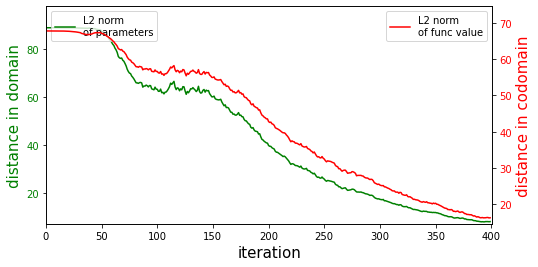

In [47]:
anas.plot_distance()

In [25]:
# init and setup one experiment
exp = single_experiment()
# One experiment: setup objective function
ak = ackley()
exp.set_objective(ak)

inner_opt = line_search()
innerOptParas = {
   'x0': None,
    'alpha': 1,
    'beta': 0.1, 
    'max_iter': 100,
    'tol': 1e-1,              
    'verbose': False,
    'record': False
}
inner_opt.set_parameters(innerOptParas)

opt = cma_es()
optParas ={'x0': torch.tensor([196.23, 123.023], requires_grad=True),
           'std': torch.ones((2,)) * 30, 
           'tol': 1e-3, 
           'adjust_func': inner_opt, 
           'record': False, 
           'verbose': True}
opt.set_parameters(optParas)
exp.set_optimizer(opt)
exp.do()



*******starting optimisation from intitial mean:  tensor([196.2300, 123.0230], grad_fn=<SqueezeBackward0>)
eigenvalue of variance = tensor([ 8.1473, 12.1323], grad_fn=<SqrtBackward>)
total iterations = 35, total evaluatios = 12136
found minimum position = tensor([ 4.1871e-07, -1.2184e-07], grad_fn=<SelectBackward>), found minimum = 9.5367431640625e-07
Result:  global minimum
found minimum: 9.5367431640625e-07, minimum position: [ 4.1870697e-07 -1.2184466e-07], evals: 12136


('global minimum', tensor(9.5367e-07, grad_fn=<SelectBackward>), 12136)

In [30]:
exp = single_experiment()
# setup objective function
ak = ackley()
exp.set_objective(ak)

inner_opt = adam()
optParas = {
         'x0': None,
         'alpha': 1,
         'beta_1': 0.9, 
         'beta_2': 0.999, 
         'epsilon': 1e-11, 
         'max_iter': 100,
         'tol': 1e-1,              
         'verbose': False,
         'record': False }
inner_opt.set_parameters(optParas)

opt = cma_es()
optParas ={'x0': torch.tensor([196.23, 123.023], requires_grad=True),
           'std': torch.ones((2,)) * 30, 
           'tol': 1e-3, 
           'adjust_func': inner_opt, 
           'record': False, 
           'verbose': True}
opt.set_parameters(optParas)
exp.set_optimizer(opt)
exp.do()



*******starting optimisation from intitial mean:  tensor([196.2300, 123.0230], grad_fn=<SqueezeBackward0>)
eigenvalue of variance = tensor([0.0018, 0.0028], grad_fn=<SqrtBackward>)
total iterations = 400, total evaluatios = 186400
found minimum position = tensor([14.0245, -5.0542], grad_fn=<SelectBackward>), found minimum = 17.66341209411621
Result:  local minimum
found minimum: 17.66341209411621, minimum position: [14.024487 -5.054191], evals: 186400


('local minimum', tensor(17.6634, grad_fn=<SelectBackward>), 186400)